# Исследование объявлений о продаже квартир

Данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

Цель исследования: установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### Общая информация. 

**Знакомство с данными**

In [1]:
#Библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Прочитаем файл

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Видно, что таблица состоит в основном из числовых данных и есть пропуски.

In [3]:
#Изучим общую информацию.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В исходных данных 23699 строк. Некоторые столбцы полные, некоторые имеют немного пропусков, а некоторые имеют очень много пропусков. Есть соменние по поводу формата данных колонок "is_apartment" и дату надо будет перевести в формат datetime.

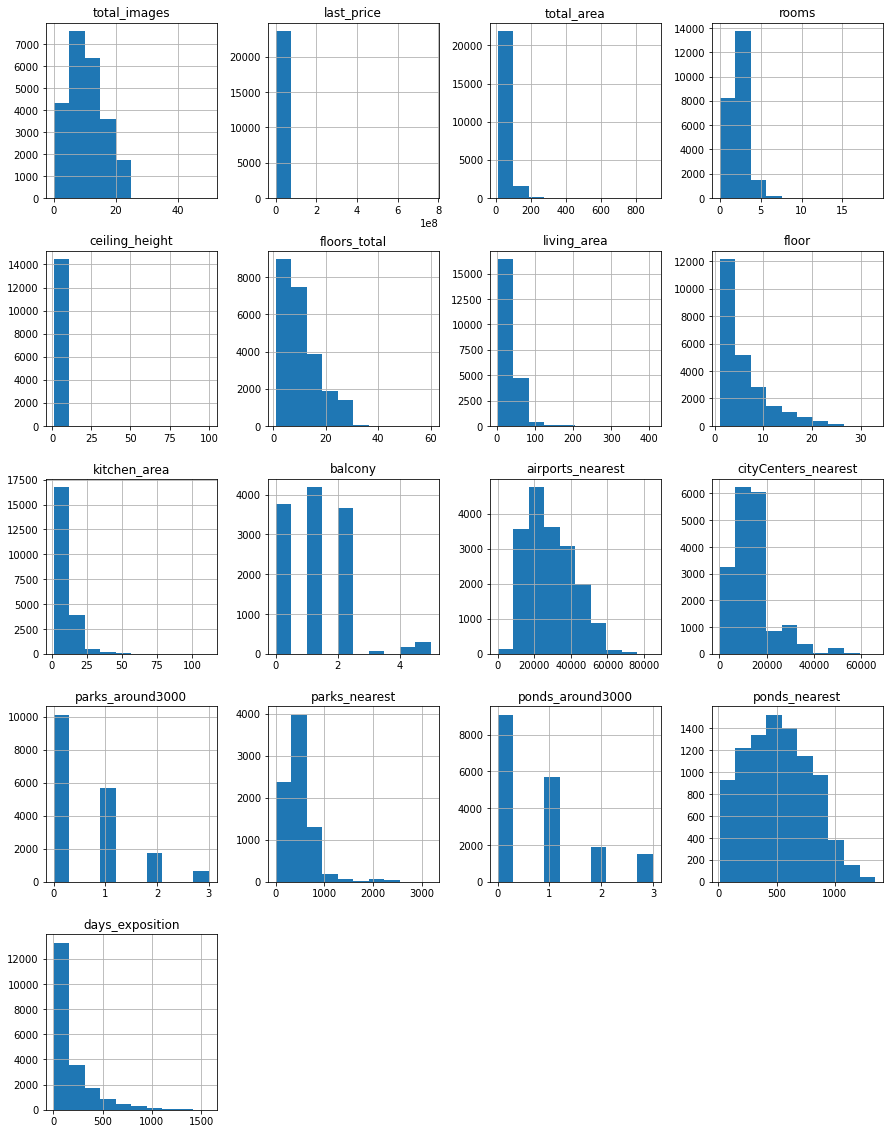

In [4]:
#Построим гистограммы.
df.hist(figsize=(15,20));

По графикам видно что встречаются, как количественные, так и дискретные величины. В основном все данные выглядят по распределению Пирсона. Но чтобы какие-то выводы делать надо обработать пропуски.

**Промежуточный вывод**

Данных оказалось не мало, что хорошо для анализа. Еще получилось некоторые гистограммы построить по ним, что свидетельствует о хорошем качестве данных. Не обошлось и без пропусков их довольно много, ими и займемся в следующем шаге.

### Предобработка данных

**Изучаем пропуски**

In [5]:
#посмотрим, в каких столбцах есть прпоуски.
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

пропусков довольно много, надо разбираться по порядку.

In [6]:
#Посчитаем процент пропусков.
df.isna().sum().sort_values()/df.shape[0]*100

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

1. Пропуски меньше одного процента не сильно могут повлиять на исследование.
2. Площадь кухни и гостинной могут быть не указаны по причине того, что их нет. Так как может быть новостройка со свободной планировкой.
3. Количество дней размещения объявление вероятней всего техническая ошибка.
4. ponds_around3000, parks_around3000, cityCenters_nearest, airports_nearest, ceiling_height - у этих колонок близкие проценты и близкий смысл. Либо нет информации по этим объектам, либо посчитали, что это не имеет значение, или отсутсвует таковые, поэтому решили пропустить ячейку.
5. ceiling_height - Либо нет информации по этим объектам, либо посчитали, что это не имеет значение
6. balcony - здесь скорее всего по причине того, что отсутствует балкон, поэтому пропущена ячейка данных.
7. ponds_nearest, parks_nearest - Либо нет информации по этим объектам, либо посчитали, что это не имеет значение, или отсутсвует таковые, поэтому решили пропустить ячейку.
8. is_apartment - тут либо техническая проблема, либо это не аппартаменты и люди не стали в этом случаи вообще заполнять.

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

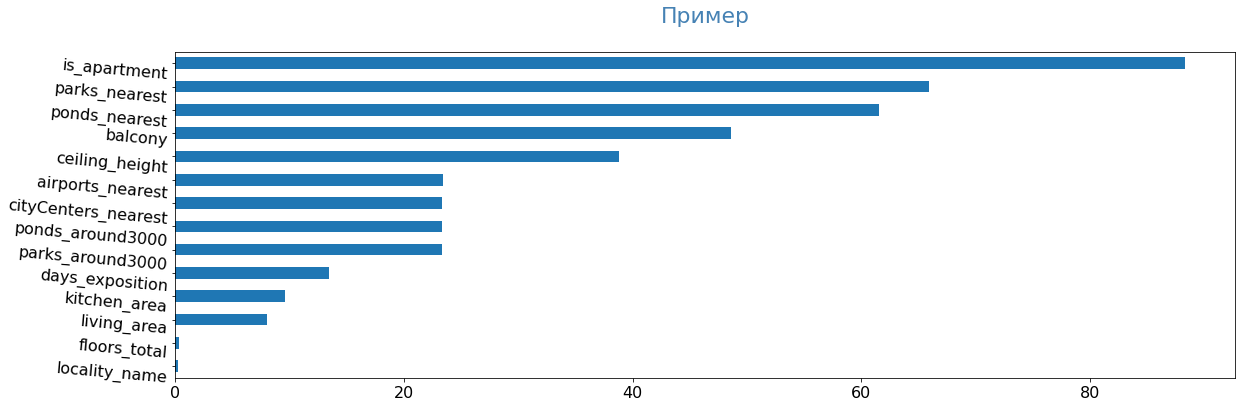

In [8]:
pass_value_barh(df)

**Заполняем пропуски, по мере заполнения преобразовываем в правильный тип данных**

In [11]:
#Для контроля посмотри на размер столбца.
df.locality_name.shape

(23699,)

In [12]:
#Удаляем строки
df = df.dropna(subset=['locality_name']).reset_index(drop=True)

#Для контроля посмотри на размер столбца.
df.locality_name.shape

(23650,)

In [13]:
#проверим заполнились ли пропуски.
df.locality_name.isna().sum()

0

Пропуски в floors_total могли образоваться в результате 1 этажной постройки и поэтому не стали заполнять. Так как эти данные меньше процента то заполним пропуски по этому предположению. Также корректируем тип, так как заполняется целыми значениями

In [16]:
#Для контроля посмотри на размер столбца.
df.floors_total.shape

(23650,)

In [17]:
#Удаляем строки
df = df.dropna(subset=['floors_total']).reset_index(drop=True)

#Для контроля посмотри на размер столбца.
df.floors_total.shape

(23565,)

Заполним balcony. И скорректируем тип так как заполняются целыми числами

In [18]:
#заполним пропуски у balcony по примеру из условия и скорректируем тип данных.
df.balcony = df.balcony.fillna(0).astype('int')

По той же логике скорректируем значения в столбцах parks_around3000 ponds_around3000. И тип так как заполняются целыми числами

In [19]:
df.parks_around3000 = df.parks_around3000.fillna(0).astype('int')
df.ponds_around3000 = df.ponds_around3000.fillna(0).astype('int')

Скорректируем у остальных столбцов тип данных, так как заполняются целыми числами.

In [20]:
#корректируем столбец 'last_price' на int, так как заполняются дискретными значениями.
df.last_price = df.last_price.astype('int')

Скорректируем тип данных в столбце is_apartment, так как правильный будет bool. Пропусков на столько много, что изменение их не повлияют на общую картину.

In [21]:
#заменим в это столбце все значения на False.
df.is_apartment = df.is_apartment.fillna(False).astype('bool')

преобразовываем first_day_exposition в дату. Надо заметить, что время везде по 0, так что его не будем учитывать.

In [22]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%d")

In [23]:
#Проверим изменения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Все данные в правильном формате.

**Поиск не явных дубликатов**

In [24]:
print(len(df.locality_name.unique()))
df.locality_name.sort_values().unique()

364


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [25]:
#замени названия в столбце на правильные.
df.locality_name = df.locality_name.replace('городской поселок Янино-1', 'городской посёлок Янино-1')
df.locality_name = df.locality_name.replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
df.locality_name = df.locality_name.replace('городской посёлок Лесогорский', 'поселок городского типа Лесогорский')
df.locality_name = df.locality_name.replace('городской посёлок Мга', 'посёлок городского типа Мга')
df.locality_name = df.locality_name.replace('городской посёлок Назия', 'поселок городского типа Назия')
df.locality_name = df.locality_name.replace('городской посёлок Павлово', 'посёлок городского типа Павлово')
df.locality_name = df.locality_name.replace('городской посёлок Рощино', 'поселок городского типа Рощино')
df.locality_name = df.locality_name.replace('посёлок городского типа Рощино', 'поселок городского типа Рощино')
df.locality_name = df.locality_name.replace('поселок Лесное', 'коттеджный посёлок Лесное')
df.locality_name = df.locality_name.replace('поселок Аннино', 'посёлок Аннино')
df.locality_name = df.locality_name.replace('поселок Бугры', 'посёлок Бугры')
df.locality_name = df.locality_name.replace('поселок Возрождение', 'посёлок Возрождение')
df.locality_name = df.locality_name.replace('поселок Гаврилово', 'посёлок Гаврилово')
df.locality_name = df.locality_name.replace('поселок Жилгородок', 'посёлок Жилгородок')
df.locality_name = df.locality_name.replace('поселок Ильичёво', 'посёлок Ильичёво')
df.locality_name = df.locality_name.replace('поселок Кобралов', 'посёлок Кобралово')
df.locality_name = df.locality_name.replace('поселок Коробицыно', 'посёлок Коробицыно')
df.locality_name = df.locality_name.replace('поселок Лисий Нос', 'посёлок Лисий Нос')
df.locality_name = df.locality_name.replace('поселок Мельниково', 'посёлок Мельниково')
df.locality_name = df.locality_name.replace('поселок Мичуринское', 'посёлок Мичуринское')
df.locality_name = df.locality_name.replace('поселок Мурино', 'посёлок Мурино')
df.locality_name = df.locality_name.replace('поселок Новый Свет', 'посёлок Новый Свет')
df.locality_name = df.locality_name.replace('поселок Пансионат Зелёный Бор', 'посёлок Пансионат Зелёный Бор')
df.locality_name = df.locality_name.replace('поселок Перово', 'посёлок Перово')
df.locality_name = df.locality_name.replace('поселок Петровское', 'посёлок Петровское')
df.locality_name = df.locality_name.replace('поселок Победа', 'посёлок Победа')
df.locality_name = df.locality_name.replace('поселок Поляны', 'посёлок Поляны')
df.locality_name = df.locality_name.replace('поселок Рябово', 'поселок городского типа Рябово')
df.locality_name = df.locality_name.replace('посёлок городского типа Рябово', 'поселок городского типа Рябово')
df.locality_name = df.locality_name.replace('поселок Стеклянный', 'посёлок Стеклянный')
df.locality_name = df.locality_name.replace('поселок Сумино', 'посёлок Сумино')
df.locality_name = df.locality_name.replace('поселок Тельмана', 'посёлок Тельмана')
df.locality_name = df.locality_name.replace('поселок Терволово', 'посёлок Терволово')
df.locality_name = df.locality_name.replace('поселок Усть-Луга', 'посёлок Усть-Луга')
df.locality_name = df.locality_name.replace('поселок городского типа Вырица', 'посёлок городского типа Вырица')
df.locality_name = df.locality_name.replace('поселок городского типа Красный Бор', 'посёлок городского типа Красный Бор')
df.locality_name = df.locality_name.replace('поселок городского типа Кузьмоловский', 'посёлок городского типа Кузьмоловский')
df.locality_name = df.locality_name.replace('поселок городского типа Лебяжье', 'посёлок городского типа Лебяжье')
df.locality_name = df.locality_name.replace('поселок городского типа Токсово', 'посёлок городского типа Токсово')
df.locality_name = df.locality_name.replace('поселок городского типа Форносово', 'посёлок городского типа Форносово')
df.locality_name = df.locality_name.replace('поселок городского типа имени Свердлова', 'посёлок городского типа имени Свердлова')

In [26]:
print(len(df.locality_name.unique()))
df.locality_name.sort_values().unique()

324


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Новоселье', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёдоровское',
       'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая 

In [27]:
# check
df.locality_name.nunique()

324

In [28]:
df.duplicated().sum()

0

In [29]:
#Посчитаем процент пропусков.
df.isna().sum().sort_values()/df.shape[0]*100

total_images             0.000000
ponds_around3000         0.000000
parks_around3000         0.000000
locality_name            0.000000
balcony                  0.000000
open_plan                0.000000
is_apartment             0.000000
floor                    0.000000
studio                   0.000000
floors_total             0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
living_area              7.914280
kitchen_area             9.429238
days_exposition         13.456397
cityCenters_nearest     23.343942
airports_nearest        23.441545
ceiling_height          38.548695
ponds_nearest           61.654997
parks_nearest           65.924040
dtype: float64

**Проработаем явные выбросы и возможные ошибки в данных**

In [30]:
#посмотри на общую характеристику данных потолков.
df.ceiling_height.describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видны проблемы не только с пропусками, но и с выбросами. Пропуски составляеют 22 процента от общего числа, возможно, если обработать выборосы, то пропуски можно будет заполнить средним значением. А так для заполнение пропусков размней использовать медиану. Данные по выосте потолка больше 10 метров сомнительны, также есть выбросы в 100 метров. Есть высота потолка в 1 метр минимальная, такое помещение возможно, например подавальное(может быть и чердак, но там ни жить не хранить ничего нельзя), но мало вероятно. Путем гугла в интернете выяснилось, что максимальная высота в 10 метров может быть у 2 этажных квартир, а минимальная высота квартиры 2,5 метра.

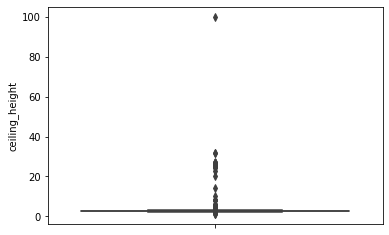

In [31]:
#Посмотрим визуально на выбросы.

sns.boxplot(data=df, y='ceiling_height');

Есть явный одиночный выборос или выбросы. Также видна группа разделенных значений, как раз на выосте потолка разумного предела. Возможно эти все данные появились путем не верного формата записи значений, или потерялись дробные части. Например 100 метров, это могло быть 10.0 метров, а по технической причине неправильно выгрузилось.

In [32]:
#заменим явный вопрос более вероятным значением.
df.ceiling_height = df.ceiling_height.replace(100, 10)

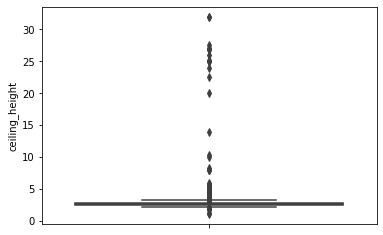

In [33]:
#Посмотрим еще раз на выборсы.
sns.boxplot(data=df, y='ceiling_height');

На графике виден явный разрыв значений. Можно считать выбивающимися значения все больше 19 метров. Для их корректировки поделим на 10.

In [34]:
df['ceiling_height'] = np.where(df['ceiling_height']>25, (df['ceiling_height'] / 10), df['ceiling_height'])

count    14481.000000
mean         2.744341
std          0.648716
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         25.000000
Name: ceiling_height, dtype: float64


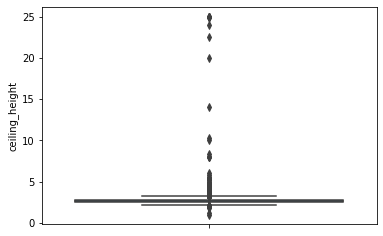

In [35]:
#Посмотрим еще раз на выборсы.
print(df.ceiling_height.describe())
sns.boxplot(data=df, y='ceiling_height');

In [36]:
#заполним пропуски медианным значением.
ceiling_height_median = df.ceiling_height.median()
print(ceiling_height_median)
df.ceiling_height = df.ceiling_height.fillna(ceiling_height_median)

#Посомтрим остались ли пропуски
df.ceiling_height.isna().sum()

2.65


0

count    23565.000000
mean         2.707974
std          0.510596
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         25.000000
Name: ceiling_height, dtype: float64


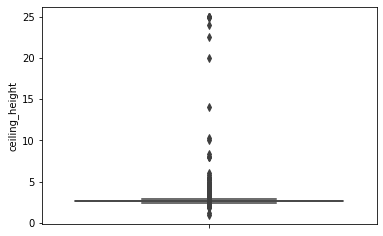

In [37]:
#Посмотрим еще раз на выборсы.
print(df.ceiling_height.describe())
sns.boxplot(data=df, y='ceiling_height');

С явным выбросами в высоте потолков поработали, в следующем шаге будем работать с этим данными дальше для анализа. Посмотри на другие столбцы, может там что-то тоже нуждается в корректировке.

**Посмотрим, может где-то можно скорректировать явные выбросы и обрезатть лишнее.**

In [38]:
#Посмотрим на данные в общем.
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.707974,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.510596,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,25.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


763000000


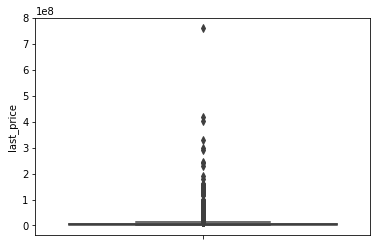

In [39]:
#Посмотрим на last_price
print(df.last_price.max())
sns.boxplot(data=df, y='last_price');

цена выше 500 миллионов похожа на выброс. Посмотрим на сами объявления.

In [40]:
df.sort_values(by='last_price', ascending=False).head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12897,19,763000000,400.0,2017-09-30,7,2.65,10.0,250.0,10,False,...,NaN,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0
19431,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0
14621,15,401300000,401.0,2016-02-20,5,2.65,9.0,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0
1431,19,330000000,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0
15565,20,300000000,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0
22701,18,289238400,187.5,2019-03-19,2,3.37,6.0,63.7,6,False,...,30.2,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,NaN
16372,17,245000000,285.7,2017-04-10,6,3.35,7.0,182.8,4,False,...,29.8,0,Санкт-Петербург,33143.0,6235.0,3,400.0,3,140.0,249.0
13671,7,240000000,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,199.0
5863,3,230000000,500.0,2017-05-31,6,2.65,7.0,NaN,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50.0
8857,13,190870000,268.0,2016-03-25,3,2.65,8.0,132.0,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,901.0


Так как цену устанавливает продавец, то возможно всякое, так что оставим этот выброс, дальше потом с ним поработаем.

In [41]:
df.total_area.loc[df.total_area*0.9 <= (df.living_area + df.kitchen_area)].count()

474

living_area и kitchen_area- заполним пропуски. Считаем, что в данных там, где есть значения в столбце floors_total можно вычислить и(или) в одном из изучаемых столбцов можно тогда вычислить параметр третьего значения. Остальные данные заполним или медианой или 0, перед этим надо будет посмотреть на данные.

In [42]:
#Сколько пропусков 'kitchen_area'
df['kitchen_area'].isnull().sum()

2222

Посмотрим какой процент пропусков составляют строки, в которых есть пропуски в столбцах и 'living_area' и 'kitchen_area'.

In [49]:
df.loc[df['kitchen_area'].isnull() & df['living_area'].isnull()].shape[0] / df.shape[0]

0.06055590918735413

удаляем эти строки, так как их слишком мало.

In [50]:
df.loc[df['kitchen_area'].isnull() & df['living_area'].isnull()].shape[0]

1427

In [51]:
df.shape[0]

23565

In [52]:
df = df.drop(df[df['kitchen_area'].isnull() & df['living_area'].isnull()].index)

In [53]:
df.shape[0]

22138

In [54]:
df.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
4,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.4,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22133,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
22134,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
22135,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
22136,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


In [55]:
df.isna().sum().sort_values()/df.shape[0]*100

total_images             0.000000
ponds_around3000         0.000000
parks_around3000         0.000000
locality_name            0.000000
balcony                  0.000000
open_plan                0.000000
is_apartment             0.000000
floor                    0.000000
studio                   0.000000
floors_total             0.000000
ceiling_height           0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
living_area              1.978499
kitchen_area             3.591110
days_exposition         13.835938
cityCenters_nearest     22.748216
airports_nearest        22.843075
ponds_nearest           61.491553
parks_nearest           65.715060
dtype: float64

Теперь заполним пустые ячейки одиночки. Их восстановим по условию , total_area*0.9 <= (living_area + kitchen_area), а остальные удалим, так как их и так меньше 4 процентов в данных.

In [56]:
#Посмотрим нет ли строк с 0.
df.loc[df['kitchen_area'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [57]:
df.loc[df['living_area'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [58]:
#Заполним пропуски
df.living_area = df.living_area.fillna(0)
df.kitchen_area = df.kitchen_area.fillna(0)

In [59]:
#Заполним по условию
df.loc[((df['living_area'] > 0) & (df['kitchen_area'] == 0)) &
       (df['total_area']*0.9 > (df['kitchen_area'] +
                                df['living_area'])), 'kitchen_area'] = (df['total_area'] * 0.9) - df['living_area']

df.loc[((df['kitchen_area'] > 0) & (df['living_area'] == 0)) &
       (df['total_area']*0.9 > (df['kitchen_area'] +
                                df['living_area'])), 'living_area'] = (df['total_area'] * 0.9) - df['kitchen_area']

In [60]:
#Остальные сроки удаляем.
df = df.drop(df[(df['kitchen_area'] == 0) | (df['living_area'] == 0)].index)
df.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.600,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
4,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.400,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22118,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
22119,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.000,4,False,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
22120,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.700,1,False,...,21.33,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
22121,13,11475000,76.75,2017-03-28,2,3.00,17.0,45.775,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


**Промежуточный вывод**

После предоработки - данные стали качественней. Исчезло большое количество пропусков, лишние данные были удалены. Была проведена работа по устранению не явных дубликатов. Также были исправлены некорректно заполненые поля, и удалены явные выбросы. 
Из данных можно отметить, что некоторые значения неоправданно низкие, но их обработаем на другом эта и определим должны они быть такими или нет. А некоторые данные непривычно большие, но они поддаются логике и кажутся на первый взгляд нормальными, но возможно их придется исключить из-за малочисленности.
Дальше добавим несколько столбцов для исследования.

Поработаем с пропусками. Удали редкие и выбивающие значения. Если можно удалить потимально до 5 процентов данных оптимально, то возьмем данные равные кватиль +- 3 квантильного размаха, получается оставим только умеренные выброс и обрубим экстримальные и потом снова взгляним на данные.

In [71]:
#Для очистки данных используем фнукцию.
def whiskers(column):
    table = df[column].describe()
    
    #Нормальные значения составляют межквартирльный размах (строки 25% и 75%):
    normal_values = table[6] - table[4]
    
    #Левый и правый ус значений изучаемого параметра: 
    left_whisker = round(table[4] - 3 * normal_values, 2)
    right_whisker = round(table[6] + 3 * normal_values, 2)

    #Левый ус не должен быть меньше минимального значения:
    if left_whisker < table[3]: left_whisker = table[3] 
        
    #Правый ус не должен быть больше максимального значения:
    if right_whisker > table[7]: right_whisker = table[7]
        
    return [left_whisker, right_whisker]

In [72]:
df['anomalous_kitchen_area'] = (df['kitchen_area'] > whiskers('kitchen_area')[1]) | (df['kitchen_area'] < whiskers('kitchen_area')[0])
df['anomalous_floor'] = (df['floor'] > whiskers('floor')[1]) | (df['floor'] < whiskers('floor')[0])
df['anomalous_floors_total'] = (df['floors_total'] > whiskers('floors_total')[1]) | (df['floors_total'] < whiskers('floors_total')[0])
df['anomalous_rooms'] = (df['rooms'] > whiskers('rooms')[1])
df['anomalous_living_area'] = (df['living_area'] > whiskers('living_area')[1]) | (df['living_area'] < whiskers('living_area')[0])

In [73]:
df = df[(df['anomalous_kitchen_area'] == False) & 
     (df['anomalous_floor'] == False) &
     (df['anomalous_floors_total'] == False) &
     (df['anomalous_rooms'] == False) &
     (df['anomalous_living_area'] == False)].reset_index(drop=True)

In [74]:
#Посмотрим, как изменились данные. Плюс добавим расчет медианого значения.
data = df.copy()
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,400.00","21,400.00","21,400.00","18,525.00","21,400.00","21,400.00","21,400.00","21,400.00","21,400.00"
min,0.00,12.00,1.00,1.00,"430,000.00",2.00,0.11,1.00,1.00
max,8.00,413.50,25.00,"1,580.00","124,000,000.00",114.00,27.00,26.00,37.00
median,2.00,51.00,2.65,99.00,"4,575,000.00",30.00,9.00,4.00,9.00


По другим, наиболее важным колонкам, посмотрим данные поближе крайних значений.

Выполним фильтрацию по столбцам 'total_area', 'ceiling_height', 'days_exposition', 'last_price' по 0,99 кватилю и 0,01.

Построим гистограммы, чтобы определить редкие значения.

In [75]:
#Создадим лист по которому будем фильтровать значения
filter_list = ['total_area', 'ceiling_height', 'days_exposition', 'last_price']

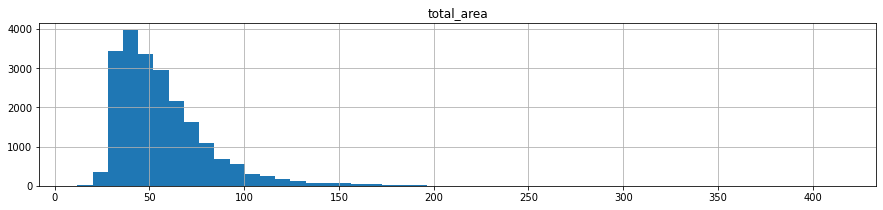

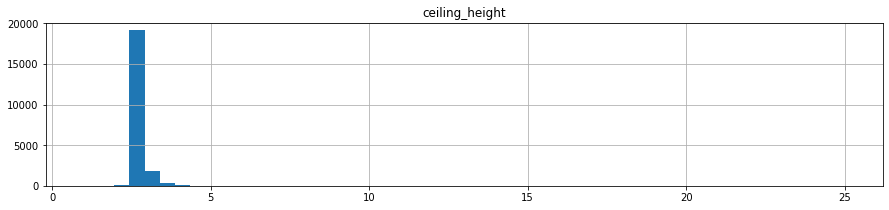

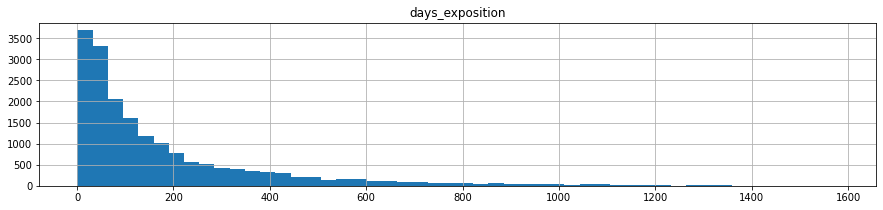

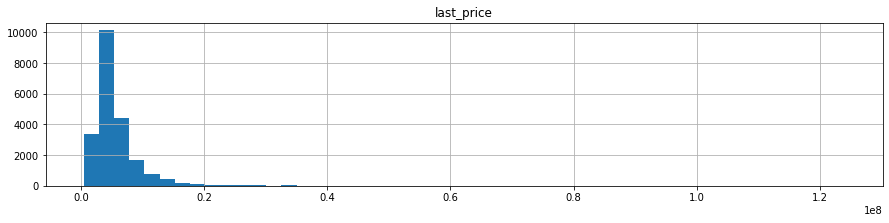

In [76]:
for i in filter_list:
    df.hist(column=i, bins = 50, figsize = (15,3));

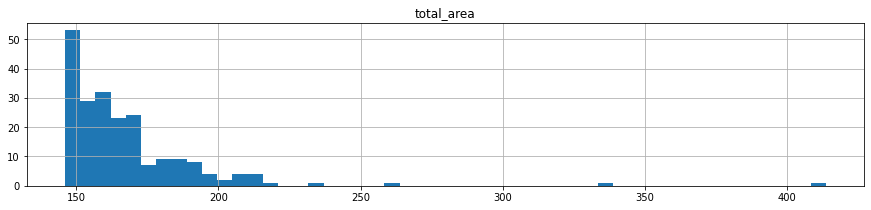

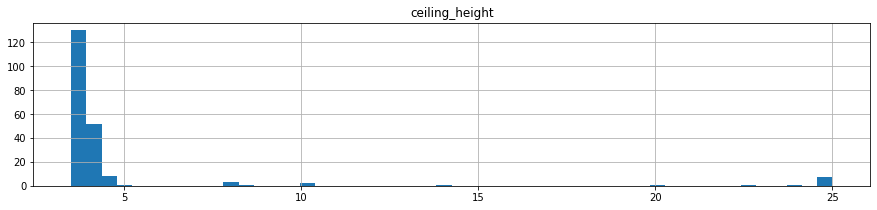

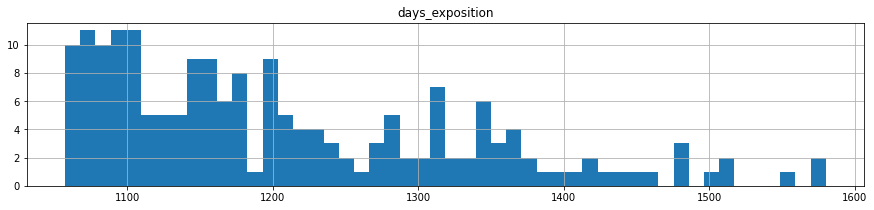

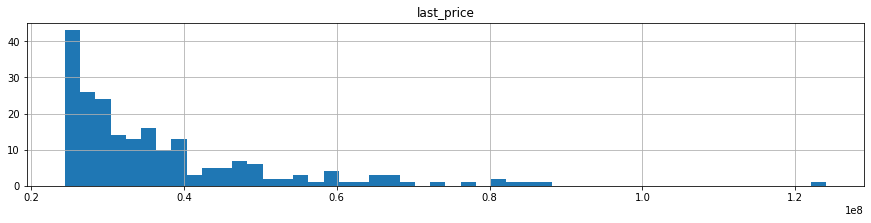

In [77]:
#Рассмотрим поближе крайние значения, сначала справа.
for i in filter_list:
    df.loc[df[i] > df[i].quantile(.99)].hist(column=i, bins = 50, figsize = (15,3));

Общую плозадь обрезам после значений 200, высоту потолком потолков после 5 метров, количество дней размещения поосле 1400 дней, а цену после 60 миллионов.

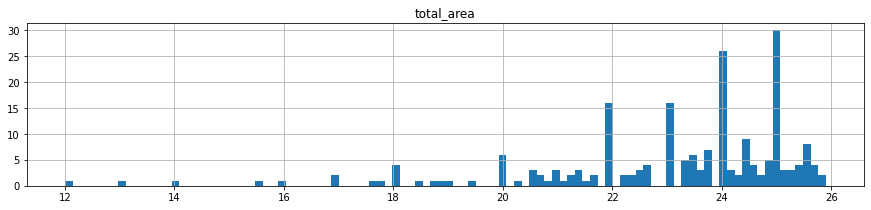

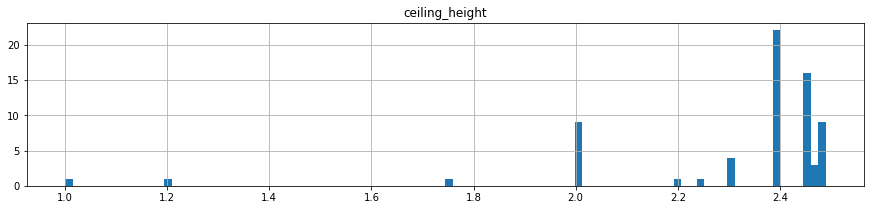

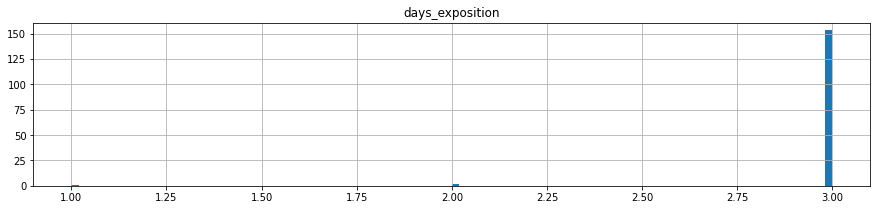

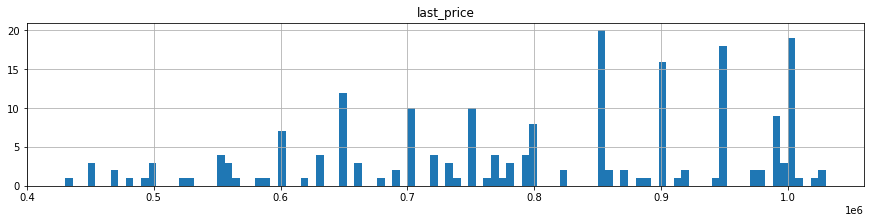

In [78]:
#Рассмотрим поближе крайние значения, сначала слева.
for i in filter_list:
    df.loc[df[i] < df[i].quantile(.01)].hist(column=i, bins = 100, figsize = (15,3));

Общую площадь обрезам до значений 10 метров, высоту потолком потолков 2 метров, количество дней размещения до 3 дней, а цену до 600 тысяч.

In [83]:
#Посмотрим, как изменились данные. Плюс добавим расчет медианого значения.
data = df.copy()
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"18,447.00","18,447.00","18,447.00","18,447.00","18,447.00","18,447.00","18,447.00","18,447.00","18,447.00"
min,0.00,12.00,2.00,3.00,"600,000.00",2.00,0.11,1.00,1.00
max,7.00,200.00,4.80,"1,396.00","59,000,000.00",114.00,27.00,26.00,36.00
median,2.00,50.00,2.65,99.00,"4,500,000.00",29.70,9.00,4.00,9.00


### Посчитайте и добавьте в таблицу новые столбцы

In [85]:
#Рассчитаем цену квадратного метра и округлим
df['price_per_meter'] = round(df['last_price'] / df['total_area']).astype('int64')

In [86]:
#Добавим столбцы дня недели, месяца и года публикации. Посмотрим результат
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,anomalous_kitchen_area,anomalous_floor,anomalous_floors_total,anomalous_rooms,anomalous_living_area,price_per_meter,weekday,month,year
0,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,81.0,False,False,False,False,False,82921,1,12,2018
1,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,558.0,False,False,False,False,False,92786,3,8,2015
2,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,55.0,False,False,False,False,False,95066,0,9,2018
3,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,155.0,False,False,False,False,False,99196,3,11,2017
4,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,189.0,False,False,False,False,False,87455,2,5,2018
5,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,289.0,False,False,False,False,False,88525,6,2,2017
6,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,137.0,False,False,False,False,False,127525,3,11,2017
7,9,3300000,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,...,7.0,False,False,False,False,False,75000,0,8,2018
8,10,3890000,54.00,2016-06-30,2,2.65,5.0,30.00,5,False,...,90.0,False,False,False,False,False,72037,3,6,2016
9,20,3550000,42.80,2017-07-01,2,2.56,5.0,27.00,5,False,...,366.0,False,False,False,False,False,82944,5,7,2017


In [87]:
#Напишем функцию категоризации по этажам, используя метод apply и применим её
def floor_definition(df):
    if (df['floor'] == 1) | (df['floor'] == 0):
        return 'первый'
    elif (abs(df['floors_total']) == abs(df['floor'])) & ((df['floor'] != 1) | (df['floor'] != 0) | (df['floor'] != -1)):
        return 'последний'
    else:
        return 'другой'
df['floor_cat'] = df.apply(floor_definition, axis = 1)

In [88]:
#посомтрим на значения расстояния до центра.
df['cityCenters_nearest']

0        18603.0
1        13933.0
2            NaN
3        19143.0
4            NaN
          ...   
18442     4489.0
18443        NaN
18444    34104.0
18445        NaN
18446    10364.0
Name: cityCenters_nearest, Length: 18447, dtype: float64

In [89]:
#расстояние до центра города в километрах (переведите из м в км и округлим до целых значений).
df['cityCenters_nearest'] = df['cityCenters_nearest'] // 1000
df['cityCenters_nearest']

0        18.0
1        13.0
2         NaN
3        19.0
4         NaN
         ... 
18442     4.0
18443     NaN
18444    34.0
18445     NaN
18446    10.0
Name: cityCenters_nearest, Length: 18447, dtype: float64

In [90]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,anomalous_kitchen_area,anomalous_floor,anomalous_floors_total,anomalous_rooms,anomalous_living_area,price_per_meter,weekday,month,year,floor_cat
0,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,False,False,False,False,False,82921,1,12,2018,первый
1,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,False,False,False,False,False,92786,3,8,2015,другой
2,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,False,False,False,False,False,95066,0,9,2018,другой
3,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,False,False,False,False,False,99196,3,11,2017,другой
4,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,False,False,False,False,False,87455,2,5,2018,другой


**Промежуточный вывод**

Добавление новых столбцов может нам в дальнейшем исследовании.

### Проведите исследовательский анализ данных

**Общая площадь**

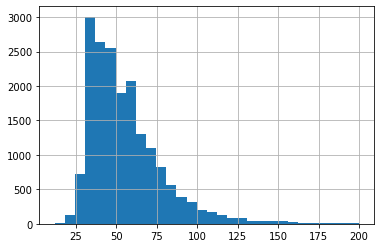

In [91]:
#гистограмма общей плщади
df.total_area.hist(bins=30);

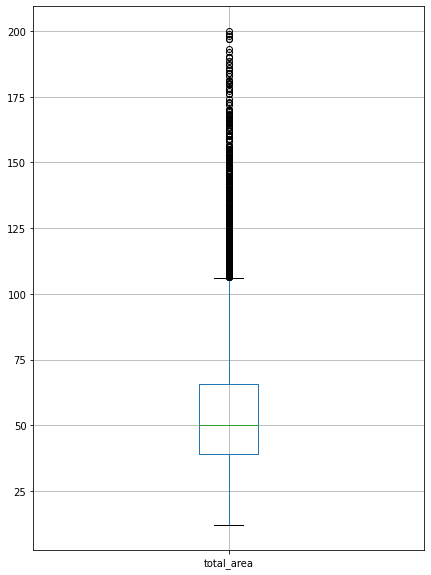

In [92]:
#Посмотри на боксплот.
df.boxplot(column='total_area', figsize = (7,10));

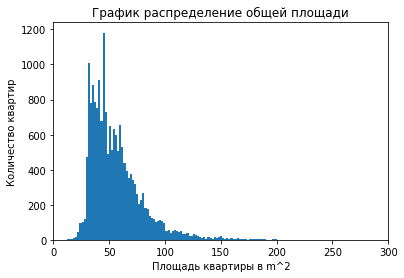

In [93]:
#Данные больше 300 сичтаем выбросами.

df.total_area.plot(kind='hist', title='График распределение общей площади', bins=100)
plt.xlabel('Площадь квартиры в m^2')
plt.ylabel('Количество квартир')
plt.xlim(0,300);

In [94]:
df.total_area.describe()

count    18447.000000
mean        55.566641
std         23.111640
min         12.000000
25%         39.000000
50%         50.000000
75%         65.900000
max        200.000000
Name: total_area, dtype: float64

График похож на нормальное распределение, пик значений приходится на значения от 40 до 70 квадратных метров, они же входят в размах бокс плота.

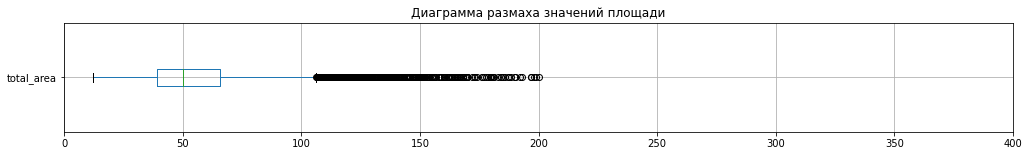

In [95]:
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

**Жилая площадь**

In [96]:
#Посмотрим на значения жилой площади.
df.living_area.describe()

count    18447.000000
mean        31.996268
std         15.731950
min          2.000000
25%         18.200000
50%         29.700000
75%         40.900000
max        114.000000
Name: living_area, dtype: float64

Так как третий квартиль имеет значения 42,8, остальное считаем выбросами и строим график по предельному значению 100 квадратных метров.

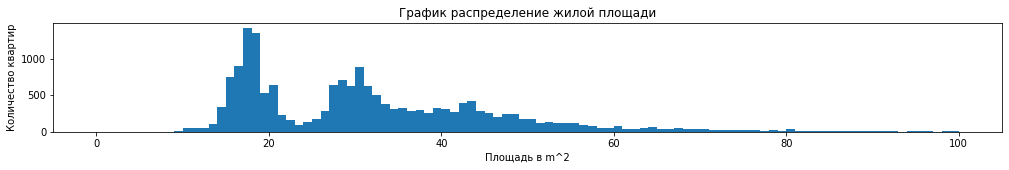

In [97]:
#построим график жилой площади.
fig, ax = plt.subplots(figsize = (17,2))
df.living_area.plot(kind='hist', title='График распределение жилой площади', bins=100, range=(0, 100), ax =ax)
plt.xlabel('Площадь в m^2')
plt.ylabel('Количество квартир');

График имеет 2 моды. Что говорит нам о том, что данные искажены, и к ним нужно относиться внимательней при исследовании.

**Площадь кухни**

In [98]:
#Посторим тоже самое с площадью кухни
df.kitchen_area.describe()

count    18447.000000
mean         9.856388
std          3.865588
min          0.112000
25%          7.000000
50%          9.000000
75%         11.500000
max         27.000000
Name: kitchen_area, dtype: float64

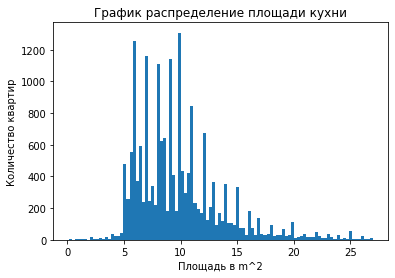

In [99]:
#построим график и учтем верхний интревал в размере 40 квадратных метров.
df.kitchen_area.plot(kind='hist', title='График распределение площади кухни', bins=100)
plt.xlabel('Площадь в m^2')
plt.ylabel('Количество квартир');

График имеет форму похожую на нормальное распределение, но имеет множество повторяющихся или близких значений.

**Цена**

In [100]:
#Посторим на last_price
df.last_price.describe()

count    1.844700e+04
mean     5.458889e+06
std      3.995480e+06
min      6.000000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.300000e+06
max      5.900000e+07
Name: last_price, dtype: float64

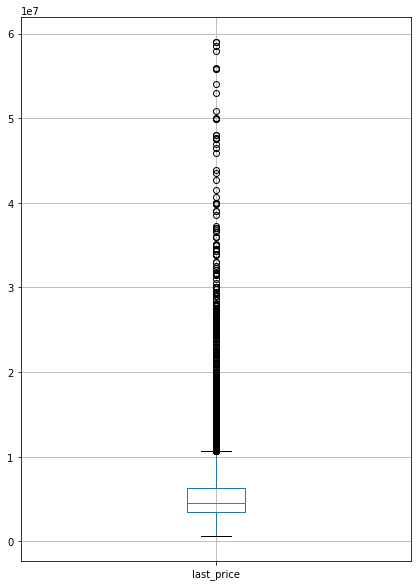

In [101]:
#Посмотри на боксплот.
df.boxplot(column='last_price', figsize = (7,10));

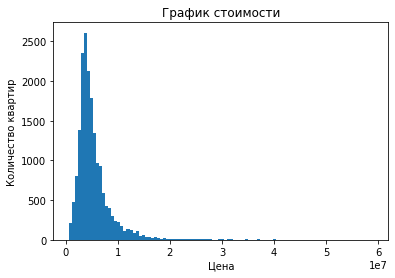

In [102]:
df.last_price.plot(kind='hist', title='График стоимости', bins=100)
plt.xlabel('Цена')
plt.ylabel('Количество квартир');

График нормально рампределен, но есть выбросы. Квартиры стоимостью 2.5 - 7.5 млн. руб составляют основную часть.

**Количество комнат**

In [103]:
#посмотрим на данные количества комнат
df.rooms.describe()

count    18447.000000
mean         1.967041
std          0.948128
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

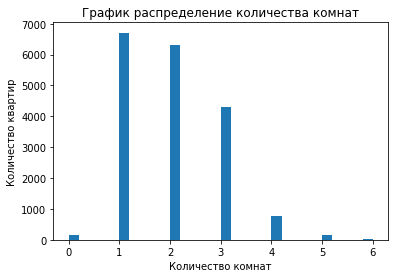

In [104]:
#построим график и учтем верхний предел в размере 6 комнат.
df.rooms.plot(kind='hist', title='График распределение количества комнат', bins=30, range=(0, 6))
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир');

График получилися ожидаемо дискретный. Что интересно квартир с 1 и 2 комнатами получилось равное количество, с 3 комнатами поменьше, и явное меньшенство с 4 комнатами, уже не говоря о остальных. Есть также знаения около 0, но на них не обращаем внимание, так как их очень мало. Также есть квартиры с 0 значений, посмотри на них.

In [105]:
df.query('rooms == 0').sort_values(by = 'total_area', ascending = False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,anomalous_kitchen_area,anomalous_floor,anomalous_floors_total,anomalous_rooms,anomalous_living_area,price_per_meter,weekday,month,year,floor_cat
2675,6,7400000,73.60,2017-05-18,0,2.65,3.0,50.0,1,False,...,False,False,False,False,False,100543,3,5,2017,первый
7807,20,5050000,44.20,2017-09-14,0,2.70,9.0,32.2,1,False,...,False,False,False,False,False,114253,3,9,2017,первый
11918,4,5970000,43.30,2017-07-20,0,2.80,9.0,28.2,2,False,...,False,False,False,False,False,137875,3,7,2017,другой
5626,8,2999000,42.63,2017-11-27,0,2.65,16.0,25.7,2,False,...,False,False,False,False,False,70350,0,11,2017,другой
12563,14,5000000,42.10,2018-04-13,0,2.65,20.0,30.0,10,False,...,False,False,False,False,False,118765,4,4,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6822,1,1350000,18.80,2017-11-22,0,2.75,19.0,15.8,1,False,...,False,False,False,False,False,71809,2,11,2017,первый
10117,8,1900000,18.00,2019-01-25,0,2.60,5.0,16.0,3,False,...,False,False,False,False,False,105556,4,1,2019,другой
547,5,1500000,17.00,2017-06-07,0,2.70,9.0,12.0,1,False,...,False,False,False,False,False,88235,2,6,2017,первый
7346,5,2100000,16.00,2017-12-10,0,2.65,6.0,13.0,1,False,...,False,False,False,False,False,131250,6,12,2017,первый


Вызывают сомнения квартиры, которвые большой площадью. Еще может быть студия, тогда с них и начнем.

In [106]:
df.query('rooms == 0').sort_values(by = 'total_area', ascending = False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,anomalous_kitchen_area,anomalous_floor,anomalous_floors_total,anomalous_rooms,anomalous_living_area,price_per_meter,weekday,month,year,floor_cat
2675,6,7400000,73.60,2017-05-18,0,2.65,3.0,50.0,1,False,...,False,False,False,False,False,100543,3,5,2017,первый
7807,20,5050000,44.20,2017-09-14,0,2.70,9.0,32.2,1,False,...,False,False,False,False,False,114253,3,9,2017,первый
11918,4,5970000,43.30,2017-07-20,0,2.80,9.0,28.2,2,False,...,False,False,False,False,False,137875,3,7,2017,другой
5626,8,2999000,42.63,2017-11-27,0,2.65,16.0,25.7,2,False,...,False,False,False,False,False,70350,0,11,2017,другой
12563,14,5000000,42.10,2018-04-13,0,2.65,20.0,30.0,10,False,...,False,False,False,False,False,118765,4,4,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6822,1,1350000,18.80,2017-11-22,0,2.75,19.0,15.8,1,False,...,False,False,False,False,False,71809,2,11,2017,первый
10117,8,1900000,18.00,2019-01-25,0,2.60,5.0,16.0,3,False,...,False,False,False,False,False,105556,4,1,2019,другой
547,5,1500000,17.00,2017-06-07,0,2.70,9.0,12.0,1,False,...,False,False,False,False,False,88235,2,6,2017,первый
7346,5,2100000,16.00,2017-12-10,0,2.65,6.0,13.0,1,False,...,False,False,False,False,False,131250,6,12,2017,первый


Часть квартир - студии. Гипотеза подтвердилась. Удалим квартиры без площади.

In [107]:
#Посмотрим на размер данных до и после.
df.shape

(18447, 32)

In [108]:
#Удалим строки
df = df.loc[~((df['total_area'] >= 35) & (df['rooms'] == 0.0)),:]

In [109]:
#после
df.shape

(18439, 32)

Удалилось 8 строк, они не повлияют на исследование и не будут отвлекать внимание.

**Высота потолка**

In [110]:
#посмотрим высоты потолков
df.ceiling_height.describe()

count    18439.000000
mean         2.682797
std          0.191442
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

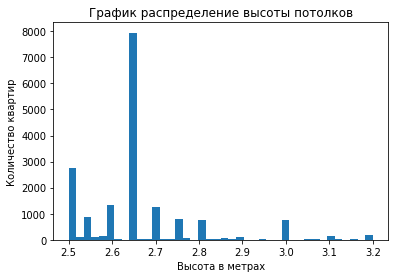

In [111]:
#построим график и учтем верхний предел в размере 3,2 метра, а нижний в размере 2,5 метра.
df.ceiling_height.plot(kind='hist', title='График распределение высоты потолков', bins=40, range=(2.5, 3.2))
plt.xlabel('Высота в метрах')
plt.ylabel('Количество квартир');

График распределения получился неоднородный. Есть 2 пика на высоте 2,5 метра и 2,65 метра. Это говорит нам о типовой застройке, где высота потолков стандартизирована. Нужно обратить внимание, что график не от 0 значений построен, так как других значений слишком мало для анализа. Избавимся от значений меньше 2,5 и больше 10 метров, так как это не корректные значений, а сами по себе, как выбросы повлияют на данные.

#### check nan

In [112]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18439 entries, 0 to 18446
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            18439 non-null  int64         
 1   last_price              18439 non-null  int64         
 2   total_area              18439 non-null  float64       
 3   first_day_exposition    18439 non-null  datetime64[ns]
 4   rooms                   18439 non-null  int64         
 5   ceiling_height          18439 non-null  float64       
 6   floors_total            18439 non-null  float64       
 7   living_area             18439 non-null  float64       
 8   floor                   18439 non-null  int64         
 9   is_apartment            18439 non-null  bool          
 10  studio                  18439 non-null  bool          
 11  open_plan               18439 non-null  bool          
 12  kitchen_area            18439 non-null  float6

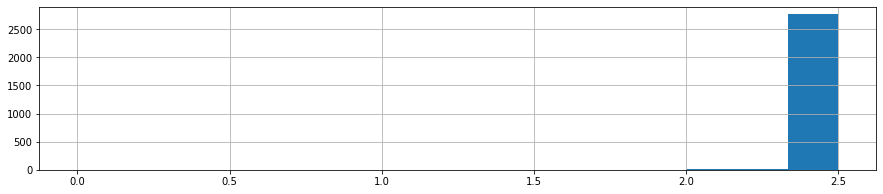

In [113]:
# check
df.ceiling_height.hist(bins = 15, figsize = (15,3), range = (0,2.5));

In [115]:
df_do = df.shape

Удалилось около 3000 значений, но качество данных увеличилось.

In [116]:
df.ceiling_height.describe()

count    18439.000000
mean         2.682797
std          0.191442
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

**Данные связанные этажностью**

In [117]:
#посмотрим данные связанные с этажность.
floors = ['floor', 'floors_total', 'floor_cat']
for i in floors:
    print(i, '\n', df[i].describe(), '\n')

floor 
 count    18439.000000
mean         5.976083
std          4.895637
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         26.000000
Name: floor, dtype: float64 

floors_total 
 count    18439.000000
mean        10.906014
std          6.605589
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64 

floor_cat 
 count      18439
unique         3
top       другой
freq       13715
Name: floor_cat, dtype: object 



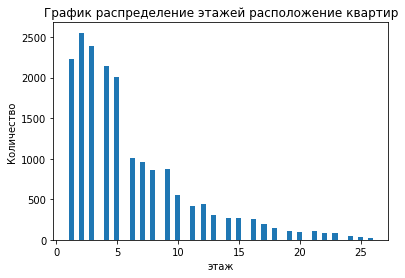

In [118]:
#Построим гистограммы на основе данных.

df.floor.plot(kind='hist', title='График распределение этажей расположение квартир',
                       bins=60)
plt.xlabel('этаж')
plt.ylabel('Количество');

На графике видно дискретность распределний значений, как и должно быть. И логически правильное распределение данных с убыванием высоты и провала, в начале на первых этажах, так как часто эту площадь занимают комерческая недвижимость.

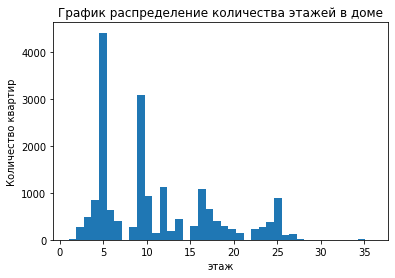

In [119]:
df.floors_total.plot(kind='hist', title='График распределение количества этажей в доме',
                       bins=40)
plt.xlabel('этаж')
plt.ylabel('Количество квартир');

На графике прослеживается две моды на 5 этажах и на 10, что соответсвует типовой застройке большинства домов.

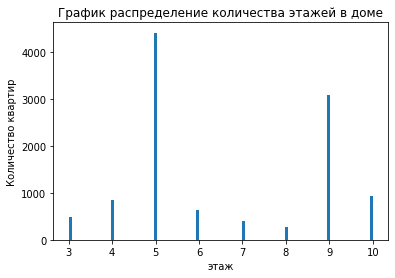

In [120]:
df.floors_total.plot(kind='hist', title='График распределение количества этажей в доме',
                       bins=100, range=(3, 10))
plt.xlabel('этаж')
plt.ylabel('Количество квартир');

На графике прослеживается две моды на 5 этажах и на 9, что соответсвует типовой застройке большинства домов.

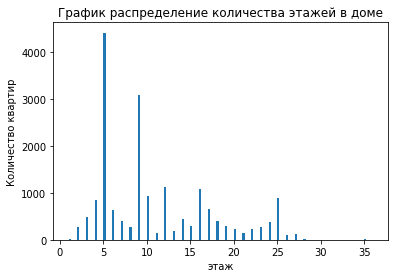

In [121]:
df.floors_total.plot(kind='hist', title='График распределение количества этажей в доме',
                       bins=140)
plt.xlabel('этаж')
plt.ylabel('Количество квартир');

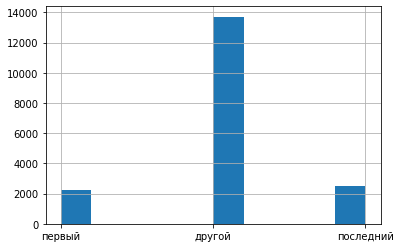

In [122]:
#построим график распределения этужей по категориями
df.floor_cat.hist();

График логически обосновывается, значит данные правдивы. Дргих этажей большей всего, первых этажей чуть меньше, чем последних из-за комерческой недвижимости.

**Данные связанные с удаленностью**

In [123]:
#Посторим на данные
df.cityCenters_nearest.describe()

count    14292.000000
mean        14.041632
std          8.583385
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         65.000000
Name: cityCenters_nearest, dtype: float64

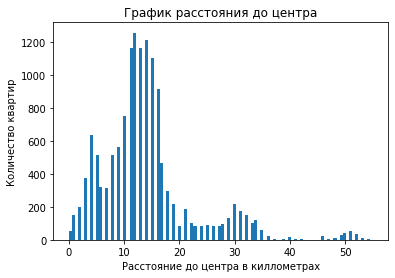

In [124]:
#построим график
df.cityCenters_nearest.plot(kind='hist', title='График расстояния до центра', bins=100, range=(0, 55))
plt.xlabel('Расстояние до центра в киллометрах')
plt.ylabel('Количество квартир');

В общем и целом график выглядит, как нормальное распределение, с отклонениями. И выбросом в районе 50 киллометров. Но надо заметить, что 25 процентов данных отсутствует

In [125]:
#Посмотри на данные
df.airports_nearest.describe()

count    14275.000000
mean     28872.662417
std      12817.010079
min          0.000000
25%      18349.000000
50%      26941.000000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

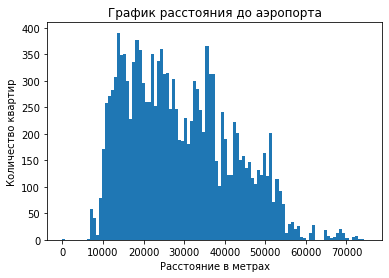

In [126]:
#построим график
df.airports_nearest.plot(kind='hist', title='График расстояния до аэропорта', bins=100, range=(0, 75000))
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир');

График починяется логиче распределения количества квартир относительно аэропорта, не смотря на то, что 25 процентов данных пропущенно.

In [127]:
#Посмотри на данные
df.parks_nearest.describe()

count    6135.000000
mean      490.107253
std       340.390222
min         1.000000
25%       287.000000
50%       453.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

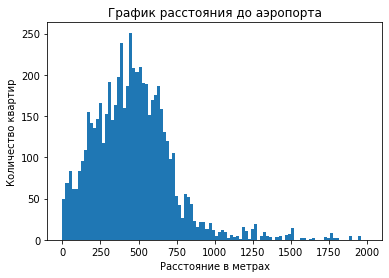

In [128]:
#построим график
df.parks_nearest.plot(kind='hist', title='График расстояния до аэропорта', bins=100, range=(0, 2000))
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир');

Не смотря на то, что 65 процентов данных отсутствуют, по тем данным , что есть прослеживается нормально распределение не считая выбросы.

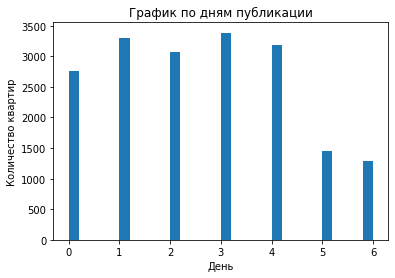

In [129]:
#Гистограмма по дням публицкаии
df.weekday.plot(kind='hist', title='График по дням публикации', bins=30)
plt.xlabel('День')
plt.ylabel('Количество квартир');

Самые активные дни публикации - будни. В выходные все или отдхают, или показывают квартиры.

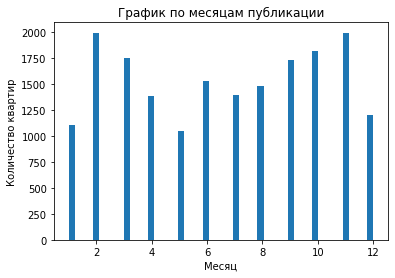

In [130]:
#Гистограмма по месяцам
df.month.plot(kind='hist', title='График по месяцам публикации', bins=50)
plt.xlabel('Месяц')
plt.ylabel('Количество квартир');

В ферале и марте выиден пик публикаций, не далеко ушли и апрель и ноябрь. А январь, май, и декабрь самые не активные месяцы.

**Количество дней размещения**

In [131]:
#Посмотри на данные
df.days_exposition.describe()

count    18439.000000
mean       180.799013
std        215.414023
min          3.000000
25%         44.000000
50%         99.000000
75%        233.000000
max       1396.000000
Name: days_exposition, dtype: float64

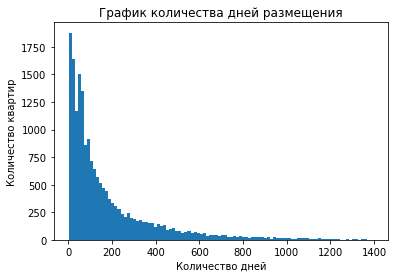

In [132]:
df.days_exposition.plot(kind='hist', title='График количества дней размещения', bins=100)
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир');

Несколько дней выбиваются сильно. Это могут особенности платформы, что срок размещения заканчивается и продялется срок с дополнительной рекламой.

Продажу квартиры дольше третьего квартиля плюс полтора размаха можно считать необычно долгой, тоесть 233 дня. Большиство квартир продается за 233 дней, так что все что быстрее 1 квартиля, тоесть 44 дней, можно считать быстрой продажей.

Продажу квартиры дольше третьего квартиля плюс полтора размаха можно считать необычно дольгой, тоесть 210 дня. Большинство квартир продается за 210 дней, так что все что быстрее 1 квантиля, тоесть 41 дней, можно считать быстрой продажей.

In [134]:
#Чтобы дальше по коду все не исправлять, добавлю переменную.
normal_df = df.copy()

In [135]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    normal_df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"18,439.00","18,439.00","18,439.00","18,439.00","18,439.00","18,439.00","18,439.00","18,439.00","18,439.00"
min,0.00,12.00,2.00,3.00,"600,000.00",2.00,0.11,1.00,1.00
max,7.00,200.00,4.80,"1,396.00","59,000,000.00",114.00,27.00,26.00,36.00


Теперь приступим к изучению зависимости данных.

In [136]:
#Создадим дата фрейм для построения зависимости.
corr_df = normal_df[['total_area', 'rooms', 'last_price', 'living_area', 'kitchen_area', 'floor_cat', 'weekday', 'month', 'year', 'cityCenters_nearest']]

,total_area,rooms,last_price,living_area,kitchen_area,weekday,month,year,cityCenters_nearest
total_area,1.000000,0.797844,0.735603,0.927926,0.511711,-0.013937,0.006537,-0.117342,-0.218818
rooms,0.797844,1.000000,0.452148,0.876512,0.158048,-0.005341,-0.000062,-0.089473,-0.149914
last_price,0.735603,0.452148,1.000000,0.633466,0.498463,-0.013902,0.010130,-0.066542,-0.322120
living_area,0.927926,0.876512,0.633466,1.000000,0.291756,-0.010390,0.000192,-0.104331,-0.207958
kitchen_area,0.511711,0.158048,0.498463,0.291756,1.000000,-0.009581,0.010596,-0.062860,-0.166023
weekday,-0.013937,-0.005341,-0.013902,-0.010390,-0.009581,1.000000,0.012715,0.002764,0.008377
month,0.006537,-0.000062,0.010130,0.000192,0.010596,0.012715,1.000000,-0.178058,-0.020106
year,-0.117342,-0.089473,-0.066542,-0.104331,-0.062860,0.002764,-0.178058,1.000000,0.034255
cityCenters_nearest,-0.218818,-0.149914,-0.322120,-0.207958,-0.166023,0.008377,-0.020106,0.034255,1.000000


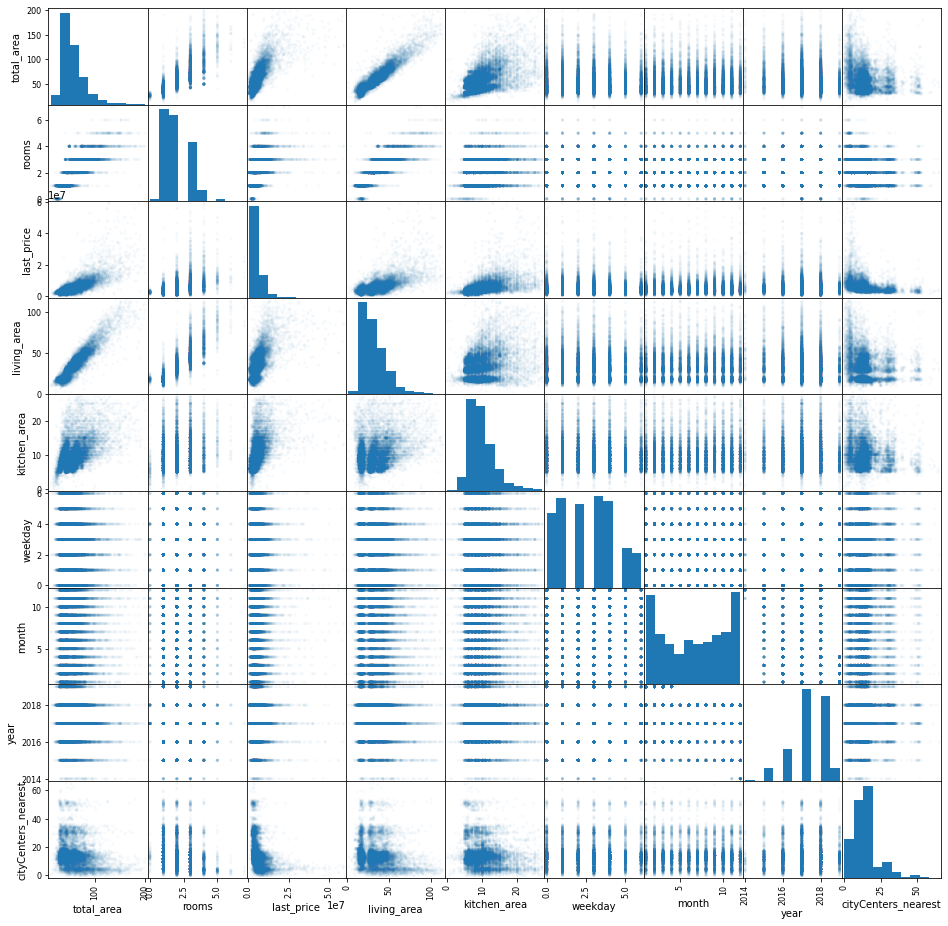

In [137]:
display(corr_df.corr())
pd.plotting.scatter_matrix(corr_df, figsize=(16,16), alpha=0.03)
plt.ticklabel_format(useOffset=False);

Наибольшая корреляция между значения площадей квартиры, как общей, так и жилой, и кухни. Средняя зависимость от количество комнат и удаленности от центра.

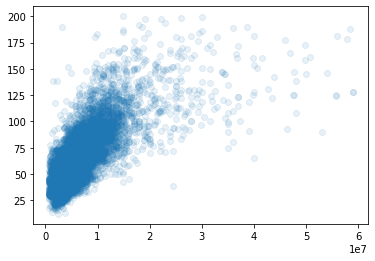

In [138]:
#Рассмотрим графики с набольшой корреляции поближе.
plt.scatter(normal_df.last_price, normal_df.total_area, alpha=0.1);

На графике видно большое скопление квартир с ценой до 10 миллионов, а дальше, хоть и квартир меньше, но корреляция сохраняется с небольшим разбросом. Чем дороже, тем меньше квартир, и тем меньше смотрят на рыночную стоимость, поэтому и разброс. Графики других площадей нет смысла строить отдельно, они выглядат похоже, но с большей дисперсией и имеют более конусообразную форму. И вывод по ним похожи, что чем больше квартира, тем более гибкие параметры остальных площадей.

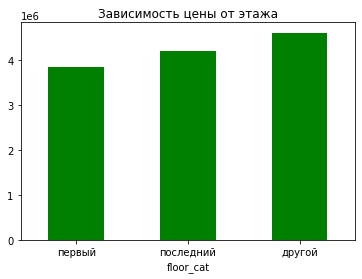

In [139]:
#График зависимость центы от этажа
floor_df = normal_df.groupby('floor_cat')['last_price'].median().sort_values()
floor_df.plot(y='median', kind='bar', color="g")
plt.xticks(rotation=0)
plt.title('Зависимость цены от этажа');

Самые дешевые квартиры расположены на первых этажах, чуть дороже квартиры на последних этажах, на остальных - самые дорогие

**Проанализируем зависимость от даты размещения: дня недели, месяца и года**

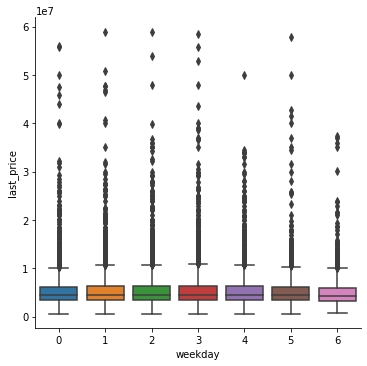

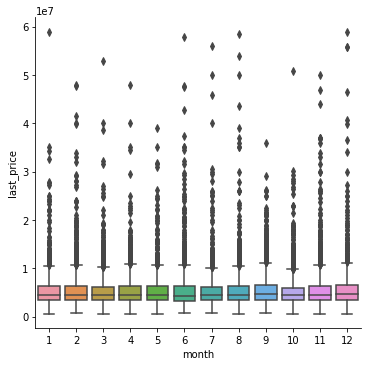

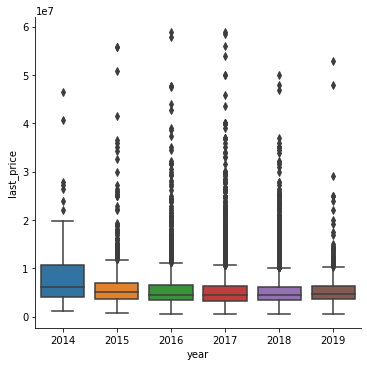

In [140]:
for column in ['weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=normal_df)

Мы видим, что день недели никак не влияет на стоимость квартиры.
Квартиры в марте и декабре стоят дороже, чем в остальные месяцы. А в июне дешевле всего.
С каждым годом недвижимость дорожает, что вполне логично. Вот только данные за 2014 год стоит проверить, слишком этот год выделяется на фоне остальных, возможно слишком маленькая выборка и данные нерепрезентативны.

In [141]:
normal_df['year'].value_counts()

2017    7213
2018    6629
2016    2513
2019    1007
2015     984
2014      93
Name: year, dtype: int64

Как мы и предполагали, за 2014 год слишком мало данных, чтобы делать выводы.

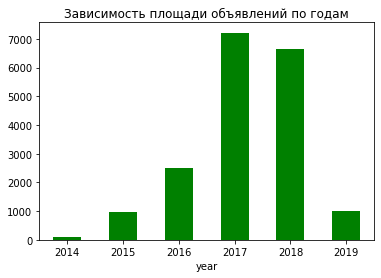

In [142]:
#Зависимость количества объявлений по годам.
year = normal_df.groupby('year')['year'].count()
year.plot(y='median', kind='bar', color="g")
plt.xticks(rotation=0)
plt.title('Зависимость площади объявлений по годам');

Количество записей с годами увеличелось и с 2017 установилось, но в 2019 слишком мало значений, можно предположить, что данные взяты не за полный год.

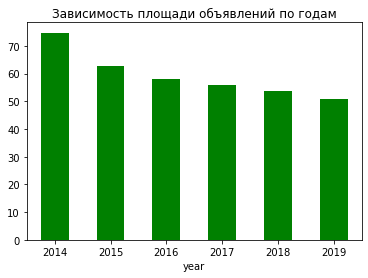

In [143]:
#Зависимость площади объявлений по годам
total_area_gr = normal_df.groupby('year')['total_area'].mean().sort_values(ascending=False)
total_area_gr.plot(y='median', kind='bar', color="g")
plt.xticks(rotation=0)
plt.title('Зависимость площади объявлений по годам');

Для анализа больше всего подходят данные за 2017 и 2018 год, так как из больше всего. Но если смотреть общую тенденцию, то в целом площадь и не меняется. А цена, если учитывать не полный 2019, то тоже не меняется. Увеличения цены можно объяснить, что большое количество объявлений размещается в первые 4 месяца года.

**Составим Топ 10 населённых пунктов с наибольшим числом объявлений.**

Посчитаем среднюю цену квадратного метра в этих населённых пунктах.
Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [144]:
locality_pivot_table = normal_df.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).round().head(10)
locality_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,12263,108956.0
посёлок Мурино,500,86227.0
посёлок Шушары,376,78220.0
Всеволожск,309,68846.0
Колпино,297,74652.0
Пушкин,274,102146.0
посёлок Парголово,272,89820.0
деревня Кудрово,263,92893.0
Гатчина,255,67745.0


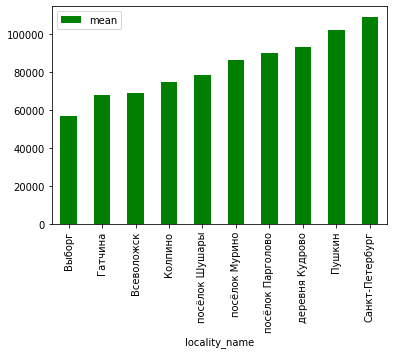

In [145]:
(
    locality_pivot_table
    .sort_values(by='mean')
    .plot(y='mean', kind='bar', color="g")
    
);

In [146]:
#Найдем максимальное значение стоимости квартиры
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].round().max()]

,count,mean
locality_name,,
Санкт-Петербург,12263,108956.0


In [147]:
#Найдем минимальное значение стоимости квартиры
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].round().min()]

,count,mean
locality_name,,
Выборг,174,56950.0


Самая низкая цена за м2 в городе Всеволожск. а самая высокая в Санкт-Петербурге

**Зависимость стоимости объекта от расстояния**

Выделим квартиры в Санкт-Петербурге. Главная задача — выяснить, какая область входит в центр.
Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра.
Построим график: он будет показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

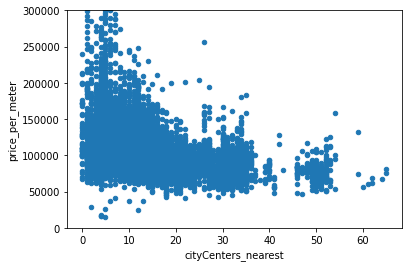

In [148]:
#Посмотрим на плотность распределения квартир по расстоянию от центра и цены.
normal_df.groupby('cityCenters_nearest')['price_per_meter'].mean().round()
normal_df.plot(x='cityCenters_nearest', y='price_per_meter', kind='scatter')
plt.ylim(0, 300000);

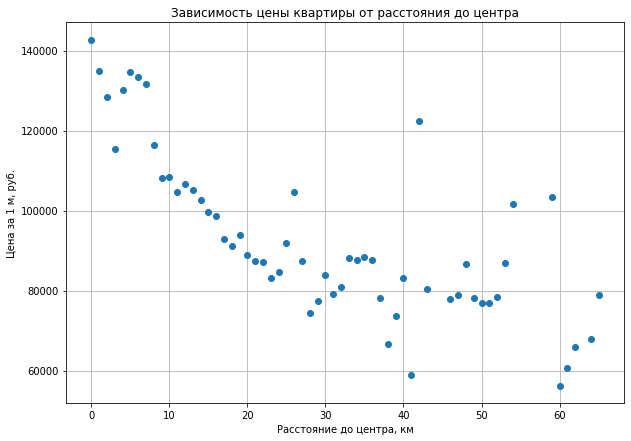

In [149]:
#Найдем среднюю цену каждого киллометра.
normal_df.groupby('cityCenters_nearest')['price_per_meter'].mean().round().plot(style='o', figsize = (10,7), grid=True)
plt.title('Зависимость цены квартиры от расстояния до центра')
plt.ylabel('Цена за 1 м, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

По графику видно разброс до 8 км, затем ромный нисходящий график, но с 25 км начинается опять разброс значений, но также с тенденцией по убыванию. Убывающую тенденцию просто объяснить, что чем дальше от центра тем дешевле. А с разбросом разбиремся ниже.

In [150]:
#Отфильтруем по расстоянию центр
center_df = normal_df.query('cityCenters_nearest <= 8 and locality_name == "Санкт-Петербург"')

In [151]:
#Оставим в таблице нужные нам параметры
center_corr_df = center_df[[
    'total_area', 
    'rooms', 
    'ceiling_height', 
    'cityCenters_nearest', 
    'floor_cat', 
    'weekday', 'month', 'year', 
    'price_per_meter'
]]

In [152]:
center_corr_df.cityCenters_nearest

20       2.0
30       3.0
47       4.0
49       4.0
56       8.0
        ... 
18422    5.0
18423    4.0
18435    7.0
18441    6.0
18442    4.0
Name: cityCenters_nearest, Length: 3066, dtype: float64

In [153]:
#Посмотрим матрицу корреляции в центре
center_corr_df.corr().round(2)

,total_area,rooms,ceiling_height,cityCenters_nearest,weekday,month,year,price_per_meter
total_area,1.00,0.79,0.27,-0.22,-0.02,0.02,-0.16,0.08
rooms,0.79,1.00,0.24,-0.23,-0.02,0.01,-0.11,-0.14
ceiling_height,0.27,0.24,1.00,-0.29,-0.05,-0.00,0.00,0.04
cityCenters_nearest,-0.22,-0.23,-0.29,1.00,0.02,-0.02,0.07,-0.04
weekday,-0.02,-0.02,-0.05,0.02,1.00,0.05,0.01,-0.00
month,0.02,0.01,-0.00,-0.02,0.05,1.00,-0.17,-0.01
year,-0.16,-0.11,0.00,0.07,0.01,-0.17,1.00,0.00
price_per_meter,0.08,-0.14,0.04,-0.04,-0.00,-0.01,0.00,1.00


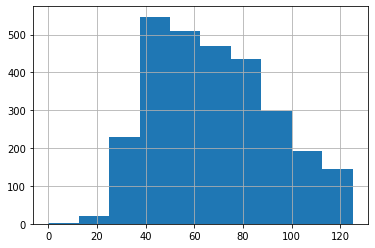

In [154]:
#Построим гистограмму предлагаемых площадей в квартирах центральной части
center_corr_df['total_area'].hist(bins = 10, range = (0,125));

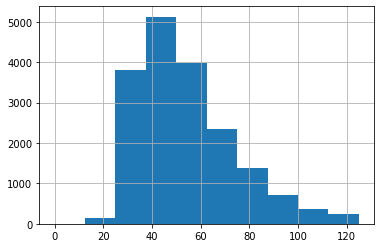

In [155]:
#Построим гистограмму предлагаемых площадей всего рынка квартир
normal_df['total_area'].hist(bins = 10, range = (0,125));

In [156]:
center_corr_df['total_area'].corr(center_corr_df['price_per_meter'])

0.07809677723872523

In [157]:
normal_df['total_area'].corr(normal_df['price_per_meter'])

0.15678139621686654

Из расспределения площадей на гистограммах мы видим, что в центральной части больше доля квартир с площадью от 50м2, а доля квартир с площадью до 40м2 меньше, чем на всем рынке недвижимости вместе.
Коэф. корреляции в центре составляет -0,42 и это дает нам понять, что есть небольшая отрицательная зависимость - чем больше площадь квартиры, тем дешевле её квадратный метр. Общий коэф.корреляции равен всего -0.068, что гворит об отсутствии взаимосвязи.

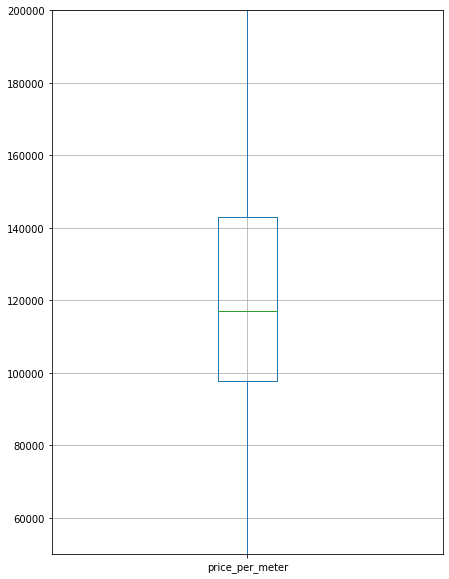

In [158]:
center_corr_df.boxplot(column='price_per_meter', figsize = (7,10))
plt.ylim(50000,200000)
plt.show()

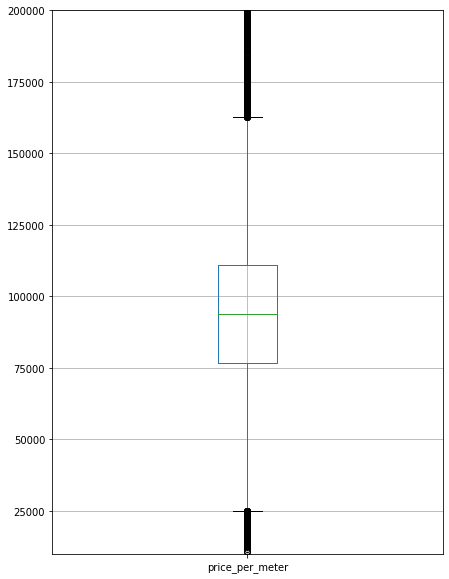

In [159]:
normal_df.boxplot(column='price_per_meter', figsize = (7,10))
plt.ylim(10000,200000)
plt.show()

Как мы видим, квартиры в центре дороже, об этом нам сообщают границы нормальных значений и межвартальный интервал и медианные значения. Это вполне соответствует законам рынка.

Посмотрим как на цену квадратного метра в центре влияет количество комнат.
Создадим сводную таблицу средних значений в центральном сегменте и рынку вцелом.

In [160]:
rooms_center_df = center_corr_df.pivot_table(index='rooms', values='price_per_meter', aggfunc='mean')
rooms_normal_df = normal_df.pivot_table(index='rooms', values='price_per_meter', aggfunc='mean')
compare_rooms = rooms_center_df.merge(rooms_normal_df, on='rooms')
compare_rooms.columns = ['center_ppm', 'all_ppm']
compare_rooms['center_ppm'] = compare_rooms['center_ppm'].astype('int64')
compare_rooms['all_ppm'] = compare_rooms['all_ppm'].astype('int64') 
compare_rooms

,center_ppm,all_ppm
rooms,,
0,136546,107471
1,138754,100045
2,128692,93620
3,125223,91964
4,119179,97818
5,106826,98065
6,104906,98579
7,132635,132635


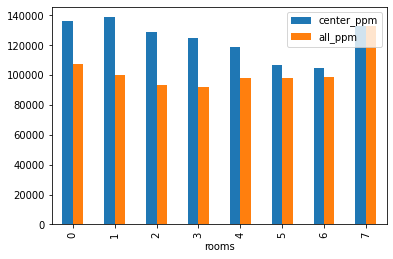

In [161]:
compare_rooms.groupby('rooms').sum().plot(kind='bar');

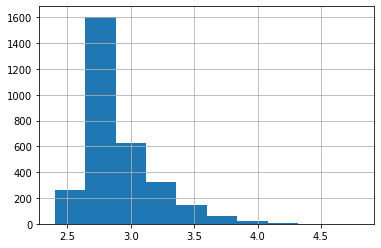

In [162]:
#Исследуем высоту потолков в центральной части
center_corr_df['ceiling_height'].hist(bins = 10);

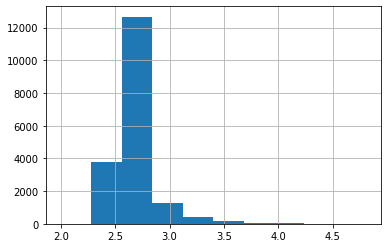

In [163]:
#Исследуем высоту потолков на всем рынке
normal_df['ceiling_height'].hist(bins = 10);

Высота потолков в центре преимущественно 3м, тогда как на всем рынке лидирует высота потолков 2.50-2.55.
Центр это дома старой застройки, сейчас дома с высотой потолков 3м строят крайне редко.

Посмотрим, как на цену квадратного метра жилья в центре влияет этаж.

In [164]:
floor_center_df = center_corr_df.pivot_table(index='floor_cat', values='price_per_meter', aggfunc='mean')
floor_normal_df = normal_df.pivot_table(index='floor_cat', values='price_per_meter', aggfunc='mean')
compare_floor = floor_center_df.merge(floor_normal_df, on='floor_cat')
compare_floor.columns = ['center_floor', 'all_floor']
compare_floor['center_floor'] = compare_floor['center_floor'].astype('int64') 
compare_floor['all_floor'] = compare_floor['all_floor'].astype('int64') 
compare_floor

,center_floor,all_floor
floor_cat,,
другой,131430,99749
первый,111554,80546
последний,121925,88582


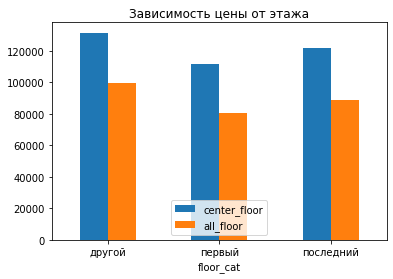

In [165]:
compare_floor.groupby('floor_cat').sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Зависимость цены от этажа')
plt.legend(loc='lower center');

Как видим, этажность одинаково влияет на цену квадратного метра жилья в обоих исследуемых сегментаж.

Посмотрим, как влияет удаленность от центра на стоимость квадратного метра.

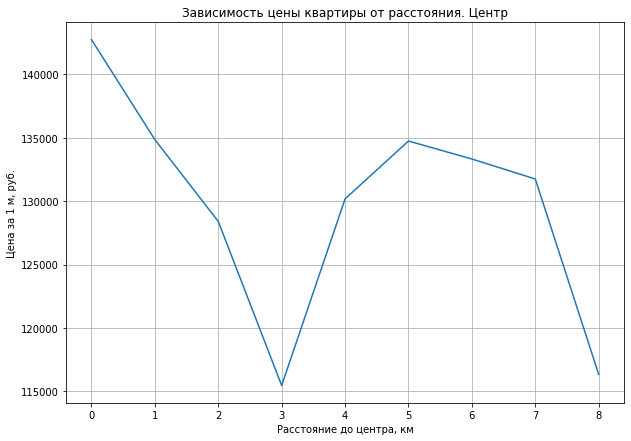

In [166]:
center_corr_df.groupby('cityCenters_nearest')['price_per_meter'].mean().round().plot(figsize = (10,7), grid=True)
plt.title('Зависимость цены квартиры от расстояния. Центр')
plt.ylabel('Цена за 1 м, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

In [167]:
center_corr_df['cityCenters_nearest'].corr(center_corr_df['price_per_meter'])

-0.04453669450312453

In [168]:
normal_df['cityCenters_nearest'].corr(normal_df['price_per_meter'])

-0.3766886421720503

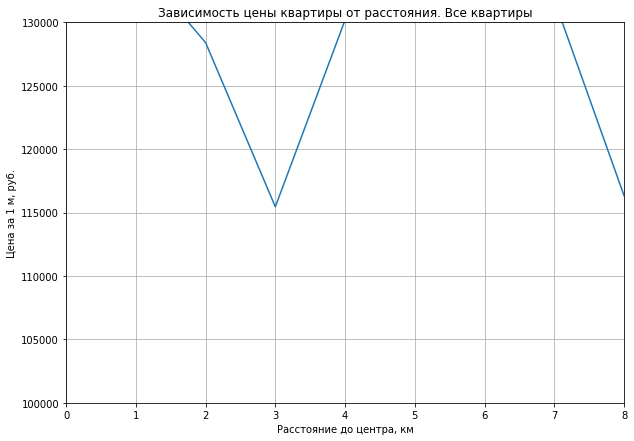

In [169]:
normal_df.groupby('cityCenters_nearest')['price_per_meter'].mean().round().plot(figsize = (10,7), grid=True)
plt.title('Зависимость цены квартиры от расстояния. Все квартиры')
plt.ylabel('Цена за 1 м, руб.')
plt.xlabel('Расстояние до центра, км')
plt.xlim(0,8)
plt.ylim(100000,130000)
plt.show()

Цена м2 имеет небольшую обратную зависимость от удаленности от центра для рынка вцелом, коэф.корреляции составляет -0.40. Для рынка в целом этот коэв. равен всего 0.04 и не играет роли

Посмотрим влияние дня, месяца и года размещения объявления в центре и сравним с рынком в целом

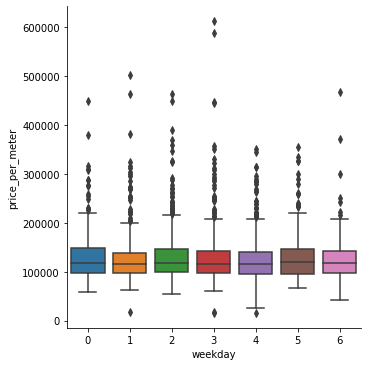

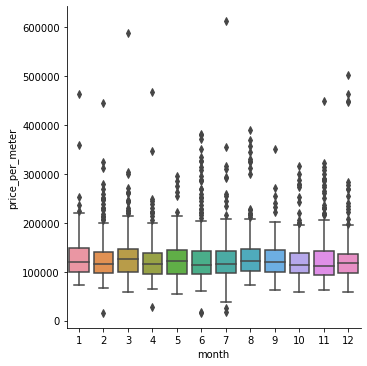

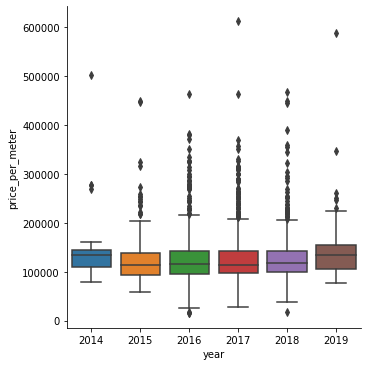

In [170]:
for column in ['weekday', 'month', 'year']:
    sns.catplot(x=column, y="price_per_meter", kind="box", data=center_corr_df)

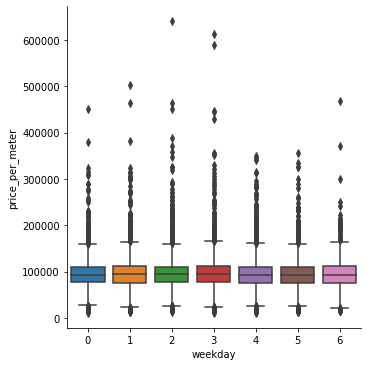

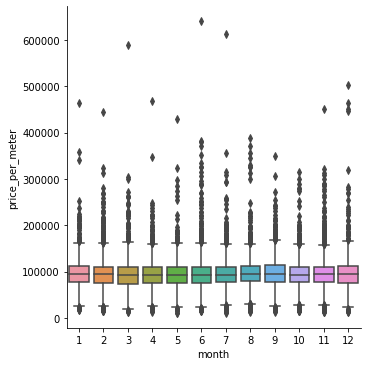

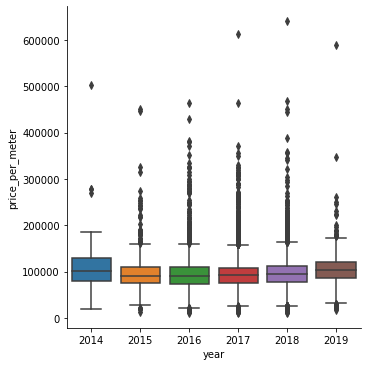

In [171]:
for column in ['weekday', 'month', 'year']:
    sns.catplot(x=column, y="price_per_meter", kind="box", data=normal_df)

В центре отмечается повышение стоимости в выходные дни, тогда как на рынке в целом цена одинаковая на протяжении всей недели.
Медианные значения цены за метр недвижимости отличаются. Так в центре ярко выражено увеличение в марте и снижение в июне, плюс необычно растянутые границы нормальных значений в мае.
Ежегодно цена за м2 имеет динамику увеличения.

Сведём в одну таблицу средние значения центральной части и всего рынка и сравним значения интересующих нас параметров.

In [172]:
center_corr_df1 = center_df[[
    'total_area', 
    'rooms', 
    'ceiling_height', 
    'cityCenters_nearest', 
    'floor_cat', 
    'weekday', 'month', 'year', 
    'price_per_meter'
]].mean().round(2)
center_corr_df1

total_area                 73.78
rooms                       2.47
ceiling_height              2.87
cityCenters_nearest         4.88
weekday                     2.54
month                       6.68
year                     2017.02
price_per_meter        127643.48
dtype: float64

In [173]:
normal_df1 = normal_df[[
    'total_area', 
    'rooms', 
    'ceiling_height', 
    'cityCenters_nearest', 
    'floor_cat', 
    'weekday', 'month', 'year', 
    'price_per_meter'
]].mean().round(2)
normal_df1

total_area                55.57
rooms                      1.97
ceiling_height             2.68
cityCenters_nearest       14.04
weekday                    2.57
month                      6.62
year                    2017.21
price_per_meter        95918.29
dtype: float64

In [174]:
center_corr_df1.values

array([7.3780000e+01, 2.4700000e+00, 2.8700000e+00, 4.8800000e+00,
       2.5400000e+00, 6.6800000e+00, 2.0170200e+03, 1.2764348e+05])

In [175]:
normal_df1.values

array([5.557000e+01, 1.970000e+00, 2.680000e+00, 1.404000e+01,
       2.570000e+00, 6.620000e+00, 2.017210e+03, 9.591829e+04])

In [176]:
normal_df1.index

Index(['total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest',
       'weekday', 'month', 'year', 'price_per_meter'],
      dtype='object')

In [177]:
d={
    "Все квартиры":[5.253000e+01, 1.920000e+00, 2.650000e+00, 1.552179e+04,
       2.570000e+00, 6.270000e+00, 2.017430e+03, 9.047843e+04],
    "Квартиры в центре":[6.1960000e+01, 2.1900000e+00, 2.7600000e+00, 5.4678500e+03,
       2.5800000e+00, 6.4200000e+00, 2.0173100e+03, 1.1894632e+05]
}

df_ss = pd.DataFrame(d, index=['total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest',
       'weekday', 'month', 'year', 'price_per_meter'])

df_ss

,Все квартиры,Квартиры в центре
total_area,52.53,61.96
rooms,1.92,2.19
ceiling_height,2.65,2.76
cityCenters_nearest,15521.79,5467.85
weekday,2.57,2.58
month,6.27,6.42
year,2017.43,2017.31
price_per_meter,90478.43,118946.32


In [178]:
df_ss['ratio'] = (df_ss["Квартиры в центре"] / df_ss["Все квартиры"] - 1) * 100
df_ss

,Все квартиры,Квартиры в центре,ratio
total_area,52.53,61.96,17.951647
rooms,1.92,2.19,14.062500
ceiling_height,2.65,2.76,4.150943
cityCenters_nearest,15521.79,5467.85,-64.773071
weekday,2.57,2.58,0.389105
month,6.27,6.42,2.392344
year,2017.43,2017.31,-0.005948
price_per_meter,90478.43,118946.32,31.463731


Сравнивая данные всех предложений с предложниями в центре, можно сделать следующие выводы:

Площадь квартиры продаваемых квартир в центре составляет в среднем почти 62 м2, что на 17.95% больше, чем средняя площадь квартир без учета локации.

Лидируют по прежнему предложения с 2 комнатами, но в центре таких квартир на 14% больше.

Высота потолков в квартирах центральной части на 4см выше.

Цена квадратного метра в центре на 31% дороже и составляет 118946 руб.

**Разброс цен после 27 км.**

Для начала посомтрим в каких городах чаще всего встречаются эти данные.

In [179]:
range27_pivot_table = df.loc[df.cityCenters_nearest > 27]
range27_pivot_table = range27_pivot_table.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc='count')
range27_pivot_table.columns = ['count']
range27_pivot_table = range27_pivot_table.sort_values('count', ascending = False).head(10)
range27_pivot_table

,count
locality_name,
Колпино,296
Петергоф,172
посёлок Шушары,156
Сестрорецк,145
Красное Село,143
Пушкин,130
Ломоносов,111
Кронштадт,81
Павловск,26


In [180]:
len(df.loc[df.cityCenters_nearest > 27].locality_name.unique())

19

In [181]:
df.loc[df.cityCenters_nearest > 27].shape

(1330, 32)

In [182]:
#Посмотрим какой процент объявлений они составляют
(df.loc[df.cityCenters_nearest > 27].shape[0] / df.shape[0]) * 100

7.2129725039318835

Таких объявлений совсем 1427, которые распологаются в 19 городах. Так как это не крупные города и таких объйвлений только 7 процентов, то разброс объявснется тем, что маленькая выборка. А также в подобных домах ценность недвижимость может зависить не только от показателей в наших данных, но и от внешних факторов, например, земля, газификация и тд.

In [183]:
#посоомтрим сколько объявлений в питере таких
range_27_df = df[(df['cityCenters_nearest'] > 27) & (df['locality_name'] == 'Санкт-Петербург')].reset_index(drop=True)
range_27_df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,anomalous_kitchen_area,anomalous_floor,anomalous_floors_total,anomalous_rooms,anomalous_living_area,price_per_meter,weekday,month,year,floor_cat
0,0,7600000,111.0,2017-07-26,3,3.00,16.0,63.0,12,False,...,False,False,False,False,False,68468,2,7,2017,другой
1,0,4072000,38.0,2015-10-14,1,2.65,5.0,16.0,4,False,...,False,False,False,False,False,107158,2,10,2015,другой
2,0,3413000,43.0,2015-11-10,1,2.65,5.0,18.0,1,False,...,False,False,False,False,False,79372,1,11,2015,первый
3,10,4850000,62.0,2017-05-16,3,2.65,5.0,35.7,1,False,...,False,False,False,False,False,78226,1,5,2017,первый
4,16,4700000,51.0,2016-06-07,2,2.60,5.0,30.0,1,False,...,False,False,False,False,False,92157,1,6,2016,первый
5,8,2450000,43.0,2018-08-14,1,2.75,5.0,16.0,1,True,...,False,False,False,False,False,56977,1,8,2018,первый
6,16,4200000,56.8,2018-07-04,2,3.50,3.0,27.9,1,False,...,False,False,False,False,False,73944,2,7,2018,первый
7,0,4990000,71.0,2015-10-14,3,2.65,5.0,42.0,1,False,...,False,False,False,False,False,70282,2,10,2015,первый
8,0,3666000,39.0,2015-11-09,1,2.65,5.0,16.0,2,False,...,False,False,False,False,False,94000,0,11,2015,другой
9,20,4370000,54.7,2016-03-23,3,2.50,5.0,32.8,5,False,...,False,False,False,False,False,79890,2,3,2016,последний


Таких квартир 12 штук. 

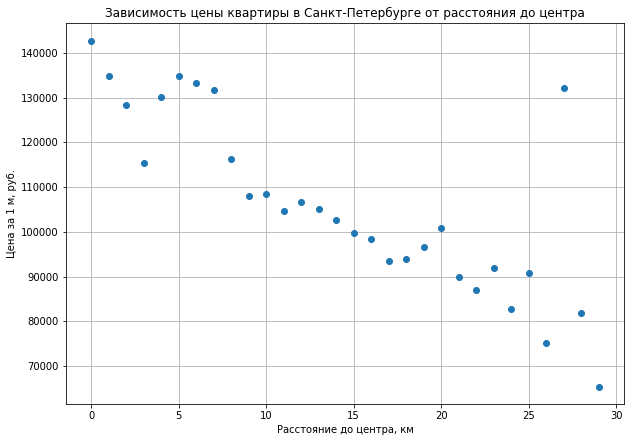

In [184]:
center_df = normal_df.query('locality_name == "Санкт-Петербург"')
center_df.groupby('cityCenters_nearest')['price_per_meter'].mean().round().plot(style='o', figsize = (10,7), grid=True)
plt.title('Зависимость цены квартиры в Санкт-Петербурге от расстояния до центра')
plt.ylabel('Цена за 1 м, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

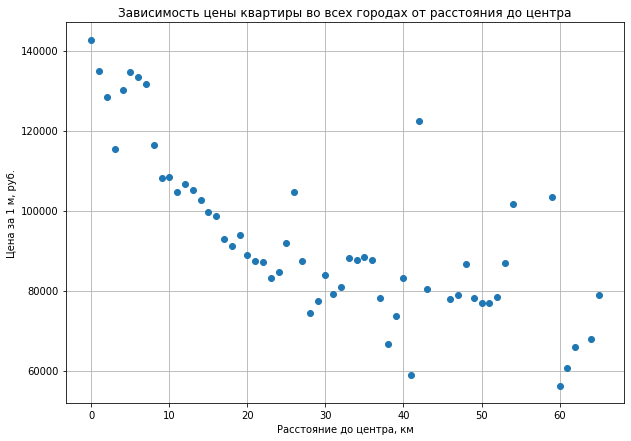

In [185]:
center_df_2 = normal_df
center_df_2.groupby('cityCenters_nearest')['price_per_meter'].mean().round().plot(style='o', figsize = (10,7), grid=True)
plt.title('Зависимость цены квартиры во всех городах от расстояния до центра')
plt.ylabel('Цена за 1 м, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

анализ расстояние дальше 27 км по этому графику представлен выше.

In [186]:
range_27_df = df[(df['cityCenters_nearest'] > 27) & (df['locality_name'] == 'Санкт-Петербург')].reset_index(drop=True)

In [187]:
df[(df['cityCenters_nearest'] == 27) & (df['locality_name'] == 'Санкт-Петербург')].reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,anomalous_kitchen_area,anomalous_floor,anomalous_floors_total,anomalous_rooms,anomalous_living_area,price_per_meter,weekday,month,year,floor_cat
0,13,14350000,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,False,False,False,False,False,193919,1,11,2017,другой
1,6,2250000,32.0,2018-02-27,1,2.65,2.0,16.5,2,False,...,False,False,False,False,False,70312,1,2,2018,последний


In [188]:
range_3_df = df[(df['cityCenters_nearest'] < 3.5) & 
     (df['cityCenters_nearest'] > 2.5)].reset_index(drop=True)
range_5_df = df[(df['cityCenters_nearest'] < 5.5) & 
     (df['cityCenters_nearest'] > 4.5)].reset_index(drop=True)

In [189]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'anomalous_kitchen_area',
       'anomalous_floor', 'anomalous_floors_total', 'anomalous_rooms',
       'anomalous_living_area', 'price_per_meter', 'weekday', 'month', 'year',
       'floor_cat'],
      dtype='object')

In [190]:
range_3_df = range_3_df.pivot_table(index = 'floor_cat', values = 'price_per_meter', aggfunc='count')
range_3_df.columns = ['count']
range_3_df = range_3_df.sort_values('count', ascending = False).head(10)
range_3_df

,count
floor_cat,
другой,236
последний,84
первый,55


In [191]:
b = []
for i in range_3_df['count']:
    a = i / range_3_df['count'].sum()
    b.append(a)
range_3_df['dolya'] = b
range_3_df

,count,dolya
floor_cat,,
другой,236,0.629333
последний,84,0.224000
первый,55,0.146667


In [192]:
range_5_df = range_5_df.pivot_table(index = 'floor_cat', values = 'price_per_meter', aggfunc='count')
range_5_df.columns = ['count']
range_5_df = range_5_df.sort_values('count', ascending = False).head(10)
range_5_df

,count
floor_cat,
другой,393
последний,70
первый,50


In [193]:
b = []
for i in range_5_df['count']:
    a = i / range_5_df['count'].sum()
    b.append(a)
range_5_df['dolya'] = b
range_5_df

,count,dolya
floor_cat,,
другой,393,0.766082
последний,70,0.136452
первый,50,0.097466


На 3 киломметре от центра квартир на последнем и первом этаже больше, чем на 5 км. А также доля таких квартир тоже больше. Можно это объяснить тем, что чем ближе к центру, тем старее дома, и люди стараются улучшить свои жилищные условия, так как на последнем этаже может быть проблема с крышой или, а на первом с подвалом. Поэтому цента уже может зависить и от состояние самого дома. Плюс, что ближе к центру, тем меньше выборка, так как окружность уменьшается, соответственно хуже подчиняется общей тенденции.

In [194]:
#посомтрим на среднее значение высоты домов
range_3_mean = df[(df['cityCenters_nearest'] < 3.5) & 
     (df['cityCenters_nearest'] > 2.5)].reset_index(drop=True)
range_5_mean = df[(df['cityCenters_nearest'] < 5.5) & 
     (df['cityCenters_nearest'] > 4.5)].reset_index(drop=True)
print(range_3_mean.floors_total.mean())
print(range_5_mean.floors_total.mean())

5.376
7.606237816764133


На 3 киломметре от центра квартир на последнем и первом этаже больше, чем на 5 км. А также доля таких квартир тоже больше. Можно объйснить это тем, что из-за того, что этажность застройки ниже, соотвественно и квартира в категории другие меньше. А разброс цен объясняется, что чем ближе к центру, тем старее дома, и люди стараются улучшить свои жилищные условия, так как на последнем этаже может быть проблема с крышой, а на первом с подвалом. Поэтому цента уже может зависить и от состояние самого дома, а так как доля таких квартир больше, а выборка мньше, то и цены не подчиняются общей тенденции.

**Промежуточный вывод**

В результате исследования данные получились логичные и не выбиваются из общей картины мира: цена зависит от удаленности от центра, большинство квартир продаются меншье, чем за год, самая дорогая недвижимость в Санкт-Петербурге.

### Общий вывод

В ходе исследования рынка недвижимости Санкт Петербурга и соседних населенных пунктов мы обработали массив данных сервиса Яндекс.Недвижимость. Определили и изучили пропущенные значения, заполнили пропуски, где это уместно и предположили причины их появления.

**Цель исследования** - выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

1. В около 60 процентов строк отсутствует информции по растоянию до парков и ближайщего водоема. У около 22 процентов объявлений отсутствует информация по расстояниям до центра. Скорее всего люди не знают этого. Для получения этих данных в дальнейшем, рекмоендую сделать автозаполнение относительно размщение объекта по геолокации.
2. У 12 процентов объявлений отсутствует дата сняти с публикации. Либо объявления не были закрыт, либо здесь явна техническая проблема, необходимо сделать дополнительное исследование и проверить где потерялись данны.
3. У 38 процентов не было высоты потолка. Можно их сделать, или обязательные для заполнения, или относительно информации по дому из геолокации.
4. Болшой процент пропусков был у балконов и являются ли квартиры аппартаменты, это 48 и 88 процентов соответственно. Эти данные можно сделать обязательные для заполнения перед публикацией.

**Для проведения анализа были поставлены впоросы:**
1. **Скорость продажи квартиры?** Изучив время продажи квартиры, мы увидели, что обычно квартиры продаются за 90 дней, а четверть квартир была продана всего за 44 день. Нормальным можно считать период 44 - 233 деня. Также можем сказать, что квартира продавалась необычно долго, если объявлению больше 233 дней.
2. **Какие факторы больше всего влияют на общую (полную) стоимость объекта?** Общая площадь - основной фактор влияющий на цену. Он имеет обратную зависит от цены. Это объясняется тем, что оптом дешевле. В меньшей степени влияет расстояние от центра, чем дальше, тем дешевле.
3. **Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.** Самая высока стоимость - Санкт-Петербург. Самая низкая стоимость - Выборг.

Результаты исследования получились логичные и понятные, без явных неожиданностей. Это нам говорит, о том, что данные были в целом хорошие и правильно обработанные.

**Общая рекомендация:**
1. Нехватет сайту автоматизации данных. Так анализ можно было провести более качественный.